In [1]:
setwd("/data/sarahgw/WGS/SNPS/All_mylu/thetas/")
require("ggplot2")
require("data.table")

Loading required package: ggplot2
Loading required package: data.table


plot density distribution of sliding window http://www.ibg.uu.se/digitalAssets/178/c_178526-l_3-k_moore-david-arbete.pdf


In [2]:
NYE=fread("NY_E_unfilt_thet.thetas_sw", header=TRUE, sep=" ")
NYU=fread("NY_U_unfilt_thet.thetas_sw", header=TRUE, sep=" ")
NJE=fread("NJ_E_unfilt_thet.thetas_sw", header=TRUE, sep=" ")
NJU=fread("NJ_U_unfilt_thet.thetas_sw", header=TRUE, sep=" ")
VTE=fread("VT_E_unfilt_thet.thetas_sw", header=TRUE, sep=" ")
VTU=fread("VT_U_unfilt_thet.thetas_sw", header=TRUE, sep=" ")

Read 20161455 rows and 4 (of 4) columns from 0.677 GB file in 00:00:23
Read 20228012 rows and 4 (of 4) columns from 0.679 GB file in 00:00:24
Read 20162910 rows and 4 (of 4) columns from 0.674 GB file in 00:00:25
Read 20160903 rows and 4 (of 4) columns from 0.677 GB file in 00:00:23
Read 20162306 rows and 4 (of 4) columns from 0.677 GB file in 00:00:24
Read 20163678 rows and 4 (of 4) columns from 0.676 GB file in 00:00:24


In [15]:
NYE=fread("NY_E_unfilt_thet_tenthou.thetas_sw.pestPG", header=TRUE, sep="\t")
NYU=fread("NY_U_unfilt_thet_tenthou.thetas_sw.pestPG", header=TRUE, sep="\t")
NJE=fread("NJ_E_unfilt_thet_tenthou.thetas_sw.pestPG", header=TRUE, sep="\t")
NJU=fread("NJ_U_unfilt_thet_tenthou.thetas_sw.pestPG", header=TRUE, sep="\t")
VTE=fread("VT_E_unfilt_thet_tenthou.thetas_sw.pestPG", header=TRUE, sep="\t")
VTU=fread("VT_U_unfilt_thet_tenthou.thetas_sw.pestPG", header=TRUE, sep="\t")

In [16]:
head(NYE)

"#(indexStart,indexStop)(firstPos_withData,lastPos_withData)(WinStart,WinStop)",Chr,WinCenter,tW,tP,tF,tH,tL,Tajima,fuf,fud,fayh,zeng,nSites
"(0,7020)(1,10001)(1,10001)",GL429767,5001,66.75215,45.01133,152.4930,27.57446,36.29290,-0.872613,-3.290868,-7.296126,0.020735,-0.108987,7020
"(7020,16314)(10001,20001)(10001,20001)",GL429767,15001,98.03660,57.93776,225.0587,29.31929,43.62853,-1.100002,-3.530478,-7.929069,0.023172,-0.132627,9294
"(16314,24528)(20001,30650)(20001,30001)",GL429767,25001,86.98830,54.94781,190.8212,23.04612,38.99696,-0.989562,-3.223229,-7.150694,0.029111,-0.131824,8214
"(24528,33218)(30650,40001)(30001,40001)",GL429767,35001,91.75091,63.90337,192.5869,75.48936,69.69637,-0.815804,-2.899033,-6.648043,-0.010024,-0.057439,8690
"(33218,42966)(40001,50001)(40001,50001)",GL429767,45001,101.87323,66.23020,228.0208,64.12485,65.17753,-0.941232,-3.292704,-7.627327,0.001640,-0.086085,9748
"(42966,52088)(50001,60001)(50001,60001)",GL429767,55001,94.25895,62.39831,207.9265,55.77441,59.08636,-0.908743,-3.193872,-7.329610,0.005578,-0.089170,9122


In [17]:
NYEz=NYE[!NYE$Tajima==0,]
NYUz=NYU[!NYU$Tajima==0,]
NJEz=NJE[!NJE$Tajima==0,]
NJUz=NJU[!NJU$Tajima==0,]
VTEz=VTE[!VTE$Tajima==0,]
VTUz=VTU[!VTU$Tajima==0,]

In [18]:
head(NYEz)

"#(indexStart,indexStop)(firstPos_withData,lastPos_withData)(WinStart,WinStop)",Chr,WinCenter,tW,tP,tF,tH,tL,Tajima,fuf,fud,fayh,zeng,nSites
"(0,7020)(1,10001)(1,10001)",GL429767,5001,66.75215,45.01133,152.4930,27.57446,36.29290,-0.872613,-3.290868,-7.296126,0.020735,-0.108987,7020
"(7020,16314)(10001,20001)(10001,20001)",GL429767,15001,98.03660,57.93776,225.0587,29.31929,43.62853,-1.100002,-3.530478,-7.929069,0.023172,-0.132627,9294
"(16314,24528)(20001,30650)(20001,30001)",GL429767,25001,86.98830,54.94781,190.8212,23.04612,38.99696,-0.989562,-3.223229,-7.150694,0.029111,-0.131824,8214
"(24528,33218)(30650,40001)(30001,40001)",GL429767,35001,91.75091,63.90337,192.5869,75.48936,69.69637,-0.815804,-2.899033,-6.648043,-0.010024,-0.057439,8690
"(33218,42966)(40001,50001)(40001,50001)",GL429767,45001,101.87323,66.23020,228.0208,64.12485,65.17753,-0.941232,-3.292704,-7.627327,0.001640,-0.086085,9748
"(42966,52088)(50001,60001)(50001,60001)",GL429767,55001,94.25895,62.39831,207.9265,55.77441,59.08636,-0.908743,-3.193872,-7.329610,0.005578,-0.089170,9122


In [23]:
NROW(NYEz)

[1] 194252

In [96]:
wilcox.test(-0.65, -0.36)


	Wilcoxon rank sum test

data:  -0.65 and -0.36
W = 0, p-value = 1
alternative hypothesis: true location shift is not equal to 0


In [24]:
sd(NYE$Tajima)/sqrt(NROW(NYE))
sd(NYU$Tajima)/sqrt(NROW(NYU))

[1] 0.0008129032

[1] 0.0008332273

In [25]:
mean(NYE$Tajima)
mean(NYU$Tajima)

[1] -0.6457455

[1] -0.5869967

In [26]:
sd(NYUz$Tajima)

[1] 0.3666812

In [21]:
wilcox.test(NYEz$Tajima, NYUz$Tajima) 


	Wilcoxon rank sum test with continuity correction

data:  NYEz$Tajima and NYUz$Tajima
W = 1.6867e+10, p-value < 2.2e-16
alternative hypothesis: true location shift is not equal to 0


In [27]:
mean(NJE$Tajima)
mean(NJU$Tajima)

[1] -0.3658849

[1] -0.656881

In [28]:
sd(NJE$Tajima)/sqrt(NROW(NJE))
sd(NJU$Tajima)/sqrt(NROW(NJU))

[1] 0.0008390141

[1] 0.0008204739

In [22]:
wilcox.test(NJEz$Tajima, NJUz$Tajima)


	Wilcoxon rank sum test with continuity correction

data:  NJEz$Tajima and NJUz$Tajima
W = 2.7653e+10, p-value < 2.2e-16
alternative hypothesis: true location shift is not equal to 0


In [35]:
NROW(NYEz)
NROW(NYUz)

[1] 19591807

[1] 19800559

In [11]:
NROW(NYEz)

[1] 19591807

In [4]:
sigSNPS=read.csv("~/WGS/SNPS/All_mylu/snps/NJNY502noout_sigCompvalues_nr_Ne424_296.csv", row.names=1)

In [5]:
head(sigSNPS)

Scaffold,NewScaf,SNP,Maj,Min,NJ,NY,NY_out,Comp,rank,padjBH
GL429767,NW_005871048.1,22649683,T,A,6.589993e-04,9.999990e-07,4.999995e-06,6.764905e-08,22,3.220679e-07
GL429767,NW_005871048.1,16839644,T,A,8.399992e-05,1.819998e-04,4.969995e-04,7.511125e-07,58,8.490880e-07
GL429767,NW_005871048.1,46534125,C,T,6.699993e-05,9.999990e-07,9.999990e-07,1.636561e-09,7,1.024761e-07
GL429768,NW_005871049.1,29962249,A,G,9.999990e-07,5.812994e-03,5.241995e-03,1.051887e-07,26,3.806257e-07
GL429768,NW_005871049.1,9041952,A,G,4.896895e-02,1.599998e-05,9.999990e-07,8.732174e-07,61,8.930063e-07
GL429768,NW_005871049.1,3921142,G,C,9.999990e-07,1.383999e-02,2.807497e-02,5.162530e-07,50,7.319724e-07


In [5]:
sigSNPSsimp=sigSNPS[c(1, 3)]

In [6]:
VTES=VTE[VTE$Chr %in% sigSNPS$Scaffold,]
VTUS=VTU[VTU$Chr %in% sigSNPS$Scaffold,]
NJES=NJE[NJE$Chr %in% sigSNPS$Scaffold,]
NJUS=NJU[NJU$Chr %in% sigSNPS$Scaffold,]
NYES=NYE[NYE$Chr %in% sigSNPS$Scaffold,]
NYUS=NYU[NYU$Chr %in% sigSNPS$Scaffold,]

In [7]:
VTEN=VTE[!VTE$Chr %in% sigSNPS$Scaffold,]
VTUN=VTU[!VTU$Chr %in% sigSNPS$Scaffold,]
NJEN=NJE[!NJE$Chr %in% sigSNPS$Scaffold,]
NJUN=NJU[!NJU$Chr %in% sigSNPS$Scaffold,]
NYEN=NYE[!NYE$Chr %in% sigSNPS$Scaffold,]
NYUN=NYU[!NYU$Chr %in% sigSNPS$Scaffold,]

In [8]:
NChr=unique(VTEN$Chr)

In [20]:
head(NChr)

[1] "GL429769" "GL429771" "GL429774" "GL429776" "GL429777" "GL429780"

In [10]:
NChr[1:92]

[1] "GL429769" "GL429771" "GL429774" "GL429776" "GL429777" "GL429780"
 [7] "GL429779" "GL429782" "GL429784" "GL429785" "GL429786" "GL429789"
[13] "GL429787" "GL429788" "GL429791" "GL429790" "GL429795" "GL429794"
[19] "GL429793" "GL429796" "GL429799" "GL429797" "GL429798" "GL429800"
[25] "GL429805" "GL429804" "GL429803" "GL429807" "GL429808" "GL429809"
[31] "GL429811" "GL429810" "GL429813" "GL429812" "GL429814" "GL429818"
[37] "GL429815" "GL429817" "GL429820" "GL429822" "GL429821" "GL429823"
[43] "GL429824" "GL429827" "GL429825" "GL429826" "GL429828" "GL429829"
[49] "GL429830" "GL429831" "GL429832" "GL429833" "GL429834" "GL429836"
[55] "GL429837" "GL429838" "GL429840" "GL429839" "GL429843" "GL429844"
[61] "GL429846" "GL429848" "GL429847" "GL429850" "GL429849" "GL429852"
[67] "GL429853" "GL429851" "GL429857" "GL429854" "GL429860" "GL429856"
[73] "GL429858" "GL429865" "GL429862" "GL429863" "GL429864" "GL429866"
[79] "GL429868" "GL429870" "GL429869" "GL429874" "GL429872" "GL429871"
[85] "GL429876" "GL429875" "GL429878" "GL429877" "GL429880" "GL429882"
[91] "GL429884" "GL429881"

In [9]:
NJES$WinCenterRound=round(NJES$WinCenter, digits=-2)
NJUS$WinCenterRound=round(NJUS$WinCenter, digits=-2)
NYES$WinCenterRound=round(NYES$WinCenter, digits=-2)
NYUS$WinCenterRound=round(NYUS$WinCenter, digits=-2)
VTES$WinCenterRound=round(VTES$WinCenter, digits=-2)
VTUS$WinCenterRound=round(VTUS$WinCenter, digits=-2)

In [10]:
NJS=merge(NJES, NJUS, by=c("Chr", "WinCenterRound"), ALL=TRUE)
NYS=merge(NYES, NYUS, by=c("Chr", "WinCenterRound"), ALL=TRUE)
VTS=merge(VTES, VTUS, by=c("Chr", "WinCenterRound"), ALL=TRUE)

In [34]:
head(NJS)

Chr,WinCenterRound,WinCenter.x,tP.x,Tajima.x,WinCenter.y,tP.y,Tajima.y
GL429767,500,501,7.117644,-0.193083,501,6.534783,-0.840757
GL429767,600,601,8.000796,-0.032375,601,7.295100,-0.662847
GL429767,700,701,8.065543,0.060906,701,7.323398,-0.563034
GL429767,800,801,8.397092,0.146473,801,7.960309,-0.429232
GL429767,900,901,8.441832,0.116201,901,8.204118,-0.438870
GL429767,1000,1001,8.520532,0.137924,1001,8.505328,-0.385208


In [11]:
NJS$Tajimadiff=NJS$Tajima.x-NJS$Tajima.y
NYS$Tajimadiff=NYS$Tajima.x-NYS$Tajima.y
VTS$Tajimadiff=VTS$Tajima.x-VTS$Tajima.y

In [12]:
NJS$tPdiff=NJS$tP.x-NJS$tP.y
NYS$tPdiff=NYS$tP.x-NYS$tP.y
VTS$tPdiff=VTS$tP.x-VTS$tP.y

In [15]:
head(NJS)

Chr,WinCenterRound,WinCenter.x,tP.x,Tajima.x,WinCenter.y,tP.y,Tajima.y,Tajimadiff,tPdiff
GL429767,500,501,7.117644,-0.193083,501,6.534783,-0.840757,0.647674,0.582861
GL429767,600,601,8.000796,-0.032375,601,7.295100,-0.662847,0.630472,0.705696
GL429767,700,701,8.065543,0.060906,701,7.323398,-0.563034,0.623940,0.742145
GL429767,800,801,8.397092,0.146473,801,7.960309,-0.429232,0.575705,0.436783
GL429767,900,901,8.441832,0.116201,901,8.204118,-0.438870,0.555071,0.237714
GL429767,1000,1001,8.520532,0.137924,1001,8.505328,-0.385208,0.523132,0.015204


In [15]:
NROW(sigSNPSsimp)

[1] 62

In [118]:
39819883-35761989

[1] 4057894

In [16]:
463041-463033

[1] 8

In [30]:
head(NJES)

Chr,WinCenter,tP,Tajima,WinCenterRound
GL429767,501,7.117644,-0.193083,500
GL429767,601,8.000796,-0.032375,600
GL429767,701,8.065543,0.060906,700
GL429767,801,8.397092,0.146473,800
GL429767,901,8.441832,0.116201,900
GL429767,1001,8.520532,0.137924,1000


In [14]:
head(sigSNPSsimp)

Scaffold,SNP
GL429767,16839644
GL429767,38456248
GL429767,22649683
GL429767,46534125
GL429767,51542832
GL429768,3921142


In [10]:
NJESnps=merge(NJES, sigSNPSsimp, by.x="Chr", by.y="Scaffold", allow.cartesian=TRUE )
NJUSnps=merge(NJUS, sigSNPSsimp, by.x="Chr", by.y="Scaffold", allow.cartesian=TRUE )
NYESnps=merge(NYES, sigSNPSsimp, by.x="Chr", by.y="Scaffold", allow.cartesian=TRUE )
NYUSnps=merge(NYUS, sigSNPSsimp, by.x="Chr", by.y="Scaffold", allow.cartesian=TRUE )
VTESnps=merge(VTES, sigSNPSsimp, by.x="Chr", by.y="Scaffold", allow.cartesian=TRUE )
VTUSnps=merge(VTUS, sigSNPSsimp, by.x="Chr", by.y="Scaffold", allow.cartesian=TRUE )

In [16]:
head(NJESnps)

Chr,WinCenter,tP,Tajima,WinCenterRound,SNP
GL429767,501,7.117644,-0.193083,500,22649683
GL429767,501,7.117644,-0.193083,500,16839644
GL429767,501,7.117644,-0.193083,500,46534125
GL429767,601,8.000796,-0.032375,600,22649683
GL429767,601,8.000796,-0.032375,600,16839644
GL429767,601,8.000796,-0.032375,600,46534125


make non significant dataframe

In [11]:
nonSNPSsimp=as.data.frame(cbind(NChr[1:92], sigSNPSsimp$SNP))

Warning message in cbind(NChr[1:92], sigSNPSsimp$SNP):
“number of rows of result is not a multiple of vector length (arg 2)”

In [12]:
colnames(nonSNPSsimp)=c("Scaffold", "SNP")

In [13]:
nonSNPSsimp$SNP=as.numeric(as.character(nonSNPSsimp$SNP))

In [20]:
class(nonSNPSsimp$SNP)

[1] "numeric"

In [14]:
NJENon=merge(NJEN, nonSNPSsimp, by.x="Chr", by.y="Scaffold", allow.cartesian=TRUE )
NJUNon=merge(NJUN, nonSNPSsimp, by.x="Chr", by.y="Scaffold", allow.cartesian=TRUE )
NYENon=merge(NYEN, nonSNPSsimp, by.x="Chr", by.y="Scaffold", allow.cartesian=TRUE )
NYUNon=merge(NYUN, nonSNPSsimp, by.x="Chr", by.y="Scaffold", allow.cartesian=TRUE )
VTENon=merge(VTEN, nonSNPSsimp, by.x="Chr", by.y="Scaffold", allow.cartesian=TRUE )
VTUNon=merge(VTUN, nonSNPSsimp, by.x="Chr", by.y="Scaffold", allow.cartesian=TRUE )

In [15]:
NJESnps$RelPos=NJESnps$WinCenterRound-NJESnps$SNP
NJUSnps$RelPos=NJUSnps$WinCenterRound-NJUSnps$SNP
NYESnps$RelPos=NYESnps$WinCenterRound-NYESnps$SNP
NYUSnps$RelPos=NYUSnps$WinCenterRound-NYUSnps$SNP
VTESnps$RelPos=VTESnps$WinCenterRound-VTESnps$SNP
VTUSnps$RelPos=VTUSnps$WinCenterRound-VTUSnps$SNP

In [16]:
NJENon$WinCenterRound=round(NJENon$WinCenter, digits=-2)
NJUNon$WinCenterRound=round(NJUNon$WinCenter, digits=-2)
NYENon$WinCenterRound=round(NYENon$WinCenter, digits=-2)
NYUNon$WinCenterRound=round(NYUNon$WinCenter, digits=-2)
VTENon$WinCenterRound=round(VTENon$WinCenter, digits=-2)
VTUNon$WinCenterRound=round(VTUNon$WinCenter, digits=-2)

In [17]:
NJENon$RelPos=NJENon$WinCenterRound-NJENon$SNP
NJUNon$RelPos=NJUNon$WinCenterRound-NJUNon$SNP
NYENon$RelPos=NYENon$WinCenterRound-NYENon$SNP
NYUNon$RelPos=NYUNon$WinCenterRound-NYUNon$SNP
VTENon$RelPos=VTENon$WinCenterRound-VTENon$SNP
VTUNon$RelPos=VTUNon$WinCenterRound-VTUNon$SNP

In [18]:
NJESnps$RelPosRound=round(NJESnps$RelPos, digits=-2)
NJUSnps$RelPosRound=round(NJUSnps$RelPos, digits=-2)
NYESnps$RelPosRound=round(NYESnps$RelPos, digits=-2)
NYUSnps$RelPosRound=round(NYUSnps$RelPos, digits=-2)
VTESnps$RelPosRound=round(VTESnps$RelPos, digits=-2)
VTUSnps$RelPosRound=round(VTUSnps$RelPos, digits=-2)

In [19]:
NJENon$RelPosRound=round(NJENon$RelPos, digits=-2)
NJUNon$RelPosRound=round(NJUNon$RelPos, digits=-2)
NYENon$RelPosRound=round(NYENon$RelPos, digits=-2)
NYUNon$RelPosRound=round(NYUNon$RelPos, digits=-2)
VTENon$RelPosRound=round(VTENon$RelPos, digits=-2)
VTUNon$RelPosRound=round(VTUNon$RelPos, digits=-2)

In [30]:
head(NJUNon)

Chr,WinCenter,tP,Tajima,SNP,WinCenterRound,RelPos,RelPosRound
GL429769,501,4.460217,-1.285753,22649683,500,-22649183,-22649200
GL429769,601,4.790970,-1.211010,22649683,600,-22649083,-22649100
GL429769,701,5.279466,-1.149385,22649683,700,-22648983,-22649000
GL429769,801,4.738931,-1.183943,22649683,800,-22648883,-22648900
GL429769,901,4.684129,-1.180752,22649683,900,-22648783,-22648800
GL429769,1001,3.833853,-1.310311,22649683,1000,-22648683,-22648700


Average across snps

In [20]:
NJESimp=NJESnps[,c(3, 4, 8)]
NJUSimp=NJUSnps[,c(3, 4, 8)]
NYESimp=NYESnps[,c(3, 4, 8)]
NYUSimp=NYUSnps[,c(3, 4, 8)]
VTESimp=VTESnps[,c(3, 4, 8)]
VTUSimp=VTUSnps[,c(3, 4, 8)]

In [21]:
NJENSimp=NJENon[,c(3, 4, 8)]
NJUNSimp=NJUNon[,c(3, 4, 8)]
NYENSimp=NYENon[,c(3, 4, 8)]
NYUNSimp=NYUNon[,c(3, 4, 8)]
VTENSimp=VTENon[,c(3, 4, 8)]
VTUNSimp=VTUNon[,c(3, 4, 8)]

In [22]:
NJE_av= do.call(data.frame, aggregate(. ~ RelPosRound, data = NJESimp, FUN = function(x) c(av = mean(x), stdev = sd(x) ) ) ) 
NJU_av= do.call(data.frame, aggregate(. ~ RelPosRound, data = NJUSimp, FUN = function(x) c(av = mean(x), stdev = sd(x) ) ) ) 
NYE_av= do.call(data.frame, aggregate(. ~ RelPosRound, data = NYESimp, FUN = function(x) c(av = mean(x), stdev = sd(x) ) ) ) 
NYU_av= do.call(data.frame, aggregate(. ~ RelPosRound, data = NYUSimp, FUN = function(x) c(av = mean(x), stdev = sd(x) ) ) ) 
VTE_av= do.call(data.frame, aggregate(. ~ RelPosRound, data = VTESimp, FUN = function(x) c(av = mean(x), stdev = sd(x) ) ) ) 
VTU_av= do.call(data.frame, aggregate(. ~ RelPosRound, data = VTUSimp, FUN = function(x) c(av = mean(x), stdev = sd(x) ) ) ) 

In [23]:
NJEN_av= do.call(data.frame, aggregate(. ~ RelPosRound, data = NJENSimp, FUN = function(x) c(av = mean(x), stdev = sd(x) ) ) ) 
NJUN_av= do.call(data.frame, aggregate(. ~ RelPosRound, data = NJUNSimp, FUN = function(x) c(av = mean(x), stdev = sd(x) ) ) ) 
NYEN_av= do.call(data.frame, aggregate(. ~ RelPosRound, data = NYENSimp, FUN = function(x) c(av = mean(x), stdev = sd(x) ) ) ) 
NYUN_av= do.call(data.frame, aggregate(. ~ RelPosRound, data = NYUNSimp, FUN = function(x) c(av = mean(x), stdev = sd(x) ) ) ) 
VTEN_av= do.call(data.frame, aggregate(. ~ RelPosRound, data = VTENSimp, FUN = function(x) c(av = mean(x), stdev = sd(x) ) ) ) 
VTUN_av= do.call(data.frame, aggregate(. ~ RelPosRound, data = VTUNSimp, FUN = function(x) c(av = mean(x), stdev = sd(x) ) ) ) 

In [30]:
NJE_av$RelPoslog =log10(abs(NJE_av$RelPosRound))
NJU_av$RelPoslog =log10(abs(NJU_av$RelPosRound))
NYE_av$RelPoslog =log10(abs(NYE_av$RelPosRound))
NYU_av$RelPoslog =log10(abs(NYU_av$RelPosRound))
VTE_av$RelPoslog =log10(abs(VTE_av$RelPosRound))
VTU_av$RelPoslog =log10(abs(VTU_av$RelPosRound))

In [31]:
NJEN_av$RelPoslog =log10(abs(NJEN_av$RelPosRound))
NJUN_av$RelPoslog =log10(abs(NJUN_av$RelPosRound))
NYEN_av$RelPoslog =log10(abs(NYEN_av$RelPosRound))
NYUN_av$RelPoslog =log10(abs(NYUN_av$RelPosRound))
VTEN_av$RelPoslog =log10(abs(VTEN_av$RelPosRound))
VTUN_av$RelPoslog =log10(abs(VTUN_av$RelPosRound))

In [32]:
NJ_av=merge(NJE_av, NJU_av, by=c("RelPosRound"), ALL=TRUE)
NY_av=merge(NYE_av, NYU_av, by=c("RelPosRound"), ALL=TRUE)
VT_av=merge(VTE_av, VTU_av, by=c("RelPosRound"), ALL=TRUE)

In [33]:
NJN_av=merge(NJEN_av, NJUN_av, by=c("RelPosRound"), ALL=TRUE)
NYN_av=merge(NYEN_av, NYUN_av, by=c("RelPosRound"), ALL=TRUE)
VTN_av=merge(VTEN_av, VTUN_av, by=c("RelPosRound"), ALL=TRUE)

In [34]:
NJ_av$Tajima.av.diff=NJ_av$Tajima.av.x-NJ_av$Tajima.av.y
NY_av$Tajima.av.diff=NY_av$Tajima.av.x-NY_av$Tajima.av.y
VT_av$Tajima.av.diff=VT_av$Tajima.av.x-VT_av$Tajima.av.y

NJ_av$tP.av.diff=NJ_av$tP.av.x-NJ_av$tP.av.y
NY_av$tP.av.diff=NY_av$tP.av.x-NY_av$tP.av.y
VT_av$tP.av.diff=VT_av$tP.av.x-VT_av$tP.av.y


In [35]:
NJN_av$Tajima.av.diff=NJN_av$Tajima.av.x-NJN_av$Tajima.av.y
NYN_av$Tajima.av.diff=NYN_av$Tajima.av.x-NYN_av$Tajima.av.y
VTN_av$Tajima.av.diff=VTN_av$Tajima.av.x-VTN_av$Tajima.av.y

NJN_av$tP.av.diff=NJN_av$tP.av.x-NJN_av$tP.av.y
NYN_av$tP.av.diff=NYN_av$tP.av.x-NYN_av$tP.av.y
VTN_av$tP.av.diff=VTN_av$tP.av.x-VTN_av$tP.av.y

multiple sizes out. 5k, 50k, 100k, 1mililon

# 5 kbasepairs

In [36]:
NJE_av_50k=NJE_av[abs(NJE_av$RelPosRound)<5000,]
NJU_av_50k=NJU_av[abs(NJU_av$RelPosRound)<5000,]
NYE_av_50k=NYE_av[abs(NYE_av$RelPosRound)<5000,]
NYU_av_50k=NYU_av[abs(NYU_av$RelPosRound)<5000,]
VTE_av_50k=VTE_av[abs(VTE_av$RelPosRound)<5000,]
VTU_av_50k=VTU_av[abs(VTU_av$RelPosRound)<5000,]

NJEN_av_50k=NJEN_av[abs(NJEN_av$RelPosRound)<5000,]
NJUN_av_50k=NJUN_av[abs(NJUN_av$RelPosRound)<5000,]
NYEN_av_50k=NYEN_av[abs(NYEN_av$RelPosRound)<5000,]
NYUN_av_50k=NYUN_av[abs(NYUN_av$RelPosRound)<5000,]
VTEN_av_50k=VTEN_av[abs(VTEN_av$RelPosRound)<5000,]
VTUN_av_50k=VTUN_av[abs(VTUN_av$RelPosRound)<5000,]

In [37]:
NJ_av_50k=NJ_av[abs(NJ_av$RelPosRound)<5000,]
NY_av_50k=NY_av[abs(NY_av$RelPosRound)<5000,]
VT_av_50k=VT_av[abs(VT_av$RelPosRound)<5000,]

NJN_av_50k=NJ_av[abs(NJN_av$RelPosRound)<5000,]
NYN_av_50k=NY_av[abs(NYN_av$RelPosRound)<5000,]
VTN_av_50k=VT_av[abs(VTN_av$RelPosRound)<5000,]

In [38]:
text = element_text(size=20)

In [44]:
legend("topright", c("Hibernia", "Williams", "Greeley"), fill=c("#ffa600", "#da4749", "#7b1958"), bty="n")
legend("topleft", c("Hibernia", "Williams", "Aeolus"), fill=c("#ffa600", "#da4749", "#5f72b7"), bty="n")


ERROR: Error in strwidth(legend, units = "user", cex = cex, font = text.font): plot.new has not been called yet


Warning message:
“Removed 1 rows containing non-finite values (stat_smooth).”Warning message:
“Removed 1 rows containing non-finite values (stat_smooth).”Warning message:
“Removed 1 rows containing non-finite values (stat_smooth).”Warning message:
“Removed 1 rows containing non-finite values (stat_smooth).”

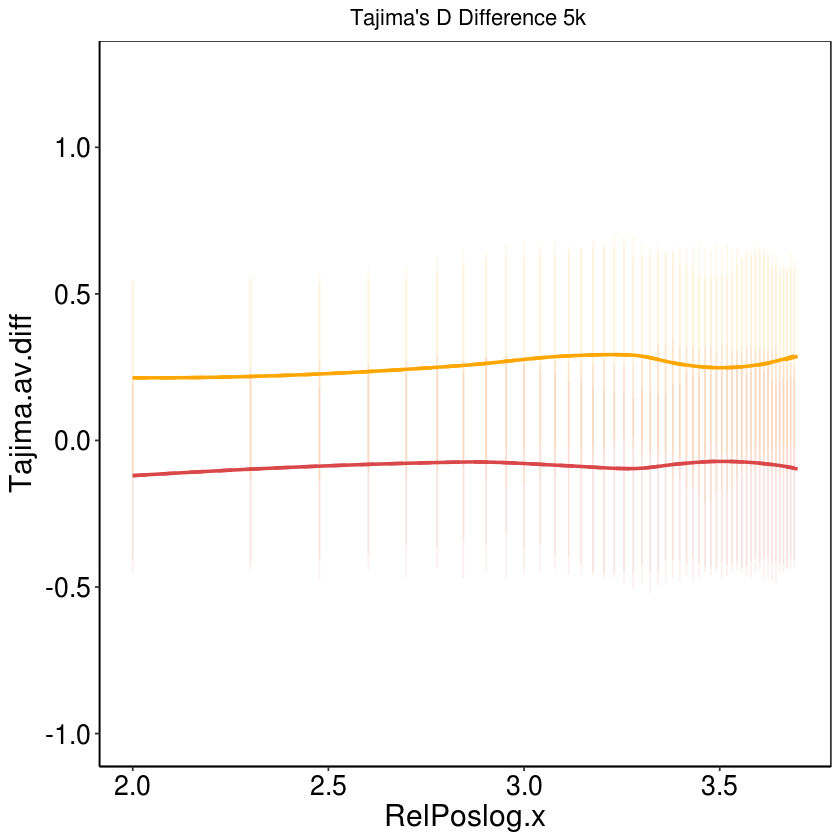

In [53]:
print(ggplot()+ theme_bw()
       + theme( panel.grid.minor = element_blank(), panel.grid.major = element_blank(), axis.line=element_line(color="black"), 
             axis.text=element_text(color="black", size=16), 
             axis.title=element_text(size=18),
            legend.text=element_text(size=14))    
     +ggtitle(" Tajima's D Difference 5k")
      +theme(plot.title = element_text(hjust = 0.5))
        + geom_linerange(data=NY_av_50k, aes(x=RelPoslog.x, ymax = NY_av_50k$Tajima.av.diff+NY_av_50k$Tajima.stdev.x, ymin = NY_av_50k$Tajima.av.diff-NY_av_50k$Tajima.stdev.y), alpha = 0.08, col="#da4749")
        + geom_linerange(data=NJ_av_50k, aes(x=RelPoslog.x, ymax = NJ_av_50k$Tajima.av.diff+NJ_av_50k$Tajima.stdev.x, ymin = NJ_av_50k$Tajima.av.diff-NJ_av_50k$Tajima.stdev.y), alpha = 0.08, col="#ffa600")
        #+ geom_linerange(data=VT_av_50k, aes(x=RelPoslog.x, ymax = VT_av_50k$Tajima.av.diff+NY_av_50k$Tajima.stdev.x, ymin = VT_av_50k$Tajima.av.diff-VT_av_50k$Tajima.stdev.y), alpha = 0.08, col="#5f72b7")
        + geom_smooth(data=NJ_av_50k, method="loess", col="#ffa600", se=FALSE, formula=y~x, aes(x=RelPoslog.x, y=Tajima.av.diff))
        + geom_smooth(data=NY_av_50k, method="loess", col="#da4749", se=FALSE, formula=y~x, aes(x=RelPoslog.x, y=Tajima.av.diff))
        #+ geom_smooth(data=VT_av_50k, method="loess", col="#5f72b7", se=FALSE, formula=y~x, aes(x=RelPoslog.x, y=Tajima.av.diff))  
        + geom_smooth(data=NJN_av_50k, method="loess", col="#ffa600",  linetype="dashed", se=FALSE, formula=y~x, aes(x=RelPoslog.x, y=Tajima.av.diff))
        + geom_smooth(data=NYN_av_50k, method="loess", col="#da4749",  linetype="dashed", se=FALSE, formula=y~x, aes(x=RelPoslog.x, y=Tajima.av.diff))
        #+ geom_smooth(data=VTN_av_50k, method="loess", col="#5f72b7",  linetype="dashed", se=FALSE, formula=y~x, aes(x=RelPoslog.x, y=Tajima.av.diff))
      + ylim(-1, 1.25)
     )

In [54]:
ggsave("/local/home/sarahgw/WGS/SNPS/All_mylu/plots/Tdiff5k_nr.pdf", h=5, w=8) 

Warning message:
“Removed 1 rows containing non-finite values (stat_smooth).”Warning message:
“Removed 1 rows containing non-finite values (stat_smooth).”Warning message:
“Removed 1 rows containing non-finite values (stat_smooth).”Warning message:
“Removed 1 rows containing non-finite values (stat_smooth).”

Warning message:
“Removed 1 rows containing non-finite values (stat_smooth).”Warning message:
“Removed 1 rows containing non-finite values (stat_smooth).”Warning message:
“Removed 1 rows containing non-finite values (stat_smooth).”Warning message:
“Removed 1 rows containing non-finite values (stat_smooth).”Warning message:
“Removed 1 rows containing non-finite values (stat_smooth).”Warning message:
“Removed 1 rows containing non-finite values (stat_smooth).”

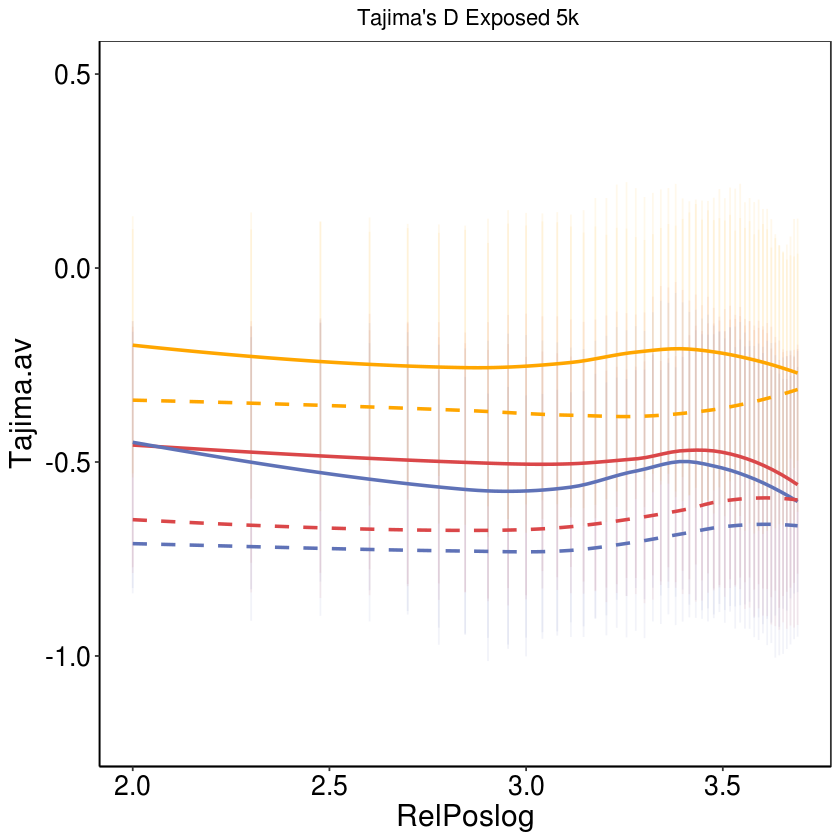

In [43]:
print(ggplot()+ theme_bw()
       + theme( panel.grid.minor = element_blank(), panel.grid.major = element_blank(), axis.line=element_line(color="black"), 
             axis.text=element_text(color="black", size=16), 
             axis.title=element_text(size=18),
            legend.text=element_text(size=14))    
     +ggtitle(" Tajima's D Exposed 5k")
      +theme(plot.title = element_text(hjust = 0.5))
        + geom_linerange(data=NYE_av_50k, aes(x=RelPoslog, ymax = NYE_av_50k$Tajima.av+NYE_av_50k$Tajima.stdev, ymin = NYE_av_50k$Tajima.av-NYE_av_50k$Tajima.stdev), alpha = 0.08, col="#da4749")
    + geom_linerange(data=NJE_av_50k, aes(x=RelPoslog, ymax = NJE_av_50k$Tajima.av+NJE_av_50k$Tajima.stdev, ymin = NJE_av_50k$Tajima.av-NJE_av_50k$Tajima.stdev), alpha = 0.08, col="#ffa600")
          + geom_linerange(data=VTE_av_50k, aes(x=RelPoslog, ymax = VTE_av_50k$Tajima.av+NYE_av_50k$Tajima.stdev, ymin = VTE_av_50k$Tajima.av-VTE_av_50k$Tajima.stdev), alpha = 0.08, col="#5f72b7")
      + geom_smooth(data=NJE_av_50k, method="loess", col="#ffa600", se=FALSE, formula=y~x, aes(x=RelPoslog, y=Tajima.av))
    + geom_smooth(data=NYE_av_50k, method="loess", col="#da4749", se=FALSE, formula=y~x, aes(x=RelPoslog, y=Tajima.av))
    + geom_smooth(data=VTE_av_50k, method="loess", col="#5f72b7", se=FALSE, formula=y~x, aes(x=RelPoslog, y=Tajima.av))  
     + geom_smooth(data=NJEN_av_50k, method="loess", col="#ffa600",  linetype="dashed", se=FALSE, formula=y~x, aes(x=RelPoslog, y=Tajima.av))
    + geom_smooth(data=NYEN_av_50k, method="loess", col="#da4749",  linetype="dashed", se=FALSE, formula=y~x, aes(x=RelPoslog, y=Tajima.av))
    + geom_smooth(data=VTEN_av_50k, method="loess", col="#5f72b7",  linetype="dashed", se=FALSE, formula=y~x, aes(x=RelPoslog, y=Tajima.av))
      + ylim(-1.2, .5))

In [44]:
ggsave("/local/home/sarahgw/WGS/SNPS/All_mylu/plots/TE5k_nr.pdf", h=5, w=8) 

Warning message:
“Removed 1 rows containing non-finite values (stat_smooth).”Warning message:
“Removed 1 rows containing non-finite values (stat_smooth).”Warning message:
“Removed 1 rows containing non-finite values (stat_smooth).”Warning message:
“Removed 1 rows containing non-finite values (stat_smooth).”Warning message:
“Removed 1 rows containing non-finite values (stat_smooth).”Warning message:
“Removed 1 rows containing non-finite values (stat_smooth).”

Warning message:
“Removed 1 rows containing non-finite values (stat_smooth).”Warning message:
“Removed 1 rows containing non-finite values (stat_smooth).”Warning message:
“Removed 1 rows containing non-finite values (stat_smooth).”Warning message:
“Removed 1 rows containing non-finite values (stat_smooth).”Warning message:
“Removed 1 rows containing non-finite values (stat_smooth).”Warning message:
“Removed 1 rows containing non-finite values (stat_smooth).”

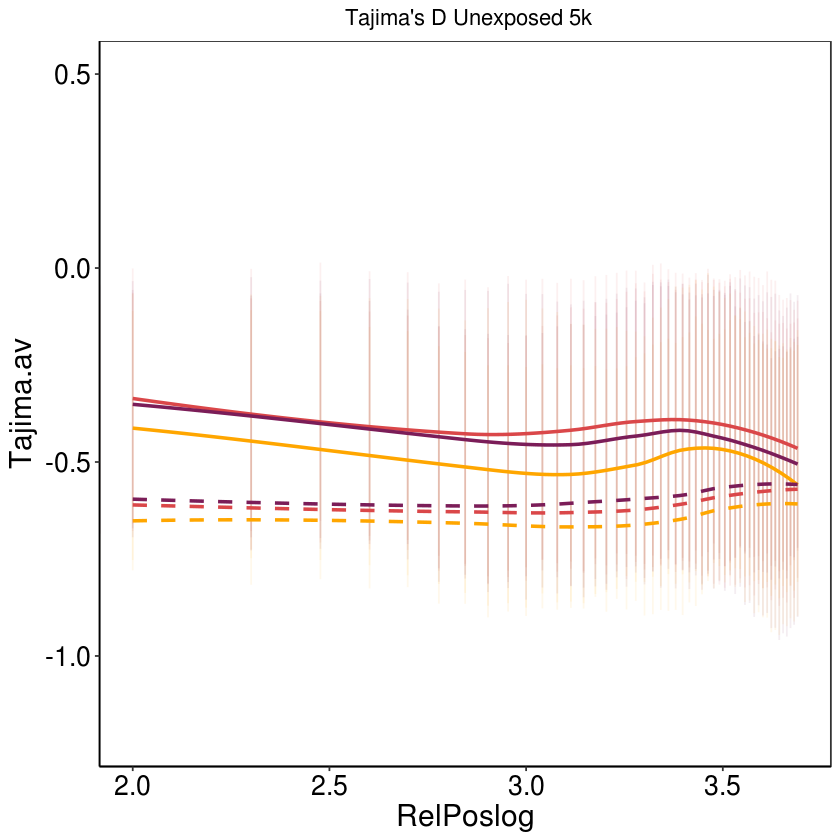

In [48]:
print(ggplot()+ theme_bw()
           + theme( panel.grid.minor = element_blank(), panel.grid.major = element_blank(), axis.line=element_line(color="black"), 
             axis.text=element_text(color="black", size=16), 
             axis.title=element_text(size=18),
            legend.text=element_text(size=14))   
      +ggtitle(" Tajima's D Unexposed 5k")+theme(plot.title = element_text(hjust = 0.5))
        + geom_linerange(data=NYU_av_50k, aes(x=RelPoslog, ymax = NYU_av_50k$Tajima.av+NYU_av_50k$Tajima.stdev, ymin = NYU_av_50k$Tajima.av-NYU_av_50k$Tajima.stdev), alpha = 0.08, col="#da4749")
    + geom_linerange(data=NJU_av_50k, aes(x=RelPoslog, ymax = NJU_av_50k$Tajima.av+NJU_av_50k$Tajima.stdev, ymin = NJU_av_50k$Tajima.av-NJU_av_50k$Tajima.stdev), alpha = 0.08, col="#ffa600")
          + geom_linerange(data=VTU_av_50k, aes(x=RelPoslog, ymax = VTU_av_50k$Tajima.av+NYU_av_50k$Tajima.stdev, ymin = VTU_av_50k$Tajima.av-VTU_av_50k$Tajima.stdev), alpha = 0.08, col="#7b1d58")
      + geom_smooth(data=NJU_av_50k, method="loess", col="#ffa600", se=FALSE, formula=y~x, aes(x=RelPoslog, y=Tajima.av))
    + geom_smooth(data=NYU_av_50k, method="loess", col="#da4749", se=FALSE, formula=y~x, aes(x=RelPoslog, y=Tajima.av))
    + geom_smooth(data=VTU_av_50k, method="loess", col="#7b1d58", se=FALSE, formula=y~x, aes(x=RelPoslog, y=Tajima.av))
      + geom_smooth(data=NJUN_av_50k, method="loess", col="#ffa600",  linetype="dashed", se=FALSE, formula=y~x, aes(x=RelPoslog, y=Tajima.av))
    + geom_smooth(data=NYUN_av_50k, method="loess", col="#da4749",  linetype="dashed", se=FALSE, formula=y~x, aes(x=RelPoslog, y=Tajima.av))
    + geom_smooth(data=VTUN_av_50k, method="loess", col="#7b1d58",  linetype="dashed", se=FALSE, formula=y~x, aes(x=RelPoslog, y=Tajima.av))
      + ylim(-1.2, .5))

In [49]:
ggsave("/local/home/sarahgw/WGS/SNPS/All_mylu/plots/TU5k_nr.pdf", h=5, w=8) 

Warning message:
“Removed 1 rows containing non-finite values (stat_smooth).”Warning message:
“Removed 1 rows containing non-finite values (stat_smooth).”Warning message:
“Removed 1 rows containing non-finite values (stat_smooth).”Warning message:
“Removed 1 rows containing non-finite values (stat_smooth).”Warning message:
“Removed 1 rows containing non-finite values (stat_smooth).”Warning message:
“Removed 1 rows containing non-finite values (stat_smooth).”

In [90]:
head(NY_av_50k$t)

,RelPosRound,tP.av.x,tP.stdev.x,Tajima.av.x,Tajima.stdev.x,RelPoslog.x,tP.av.y,tP.stdev.y,Tajima.av.y,Tajima.stdev.y,RelPoslog.y,Tajima.av.diff
465288,-4900,11.70735,4.663951,-0.5644386,0.3556204,8.496990,12.25424,4.753930,-0.4641761,0.3343350,8.496990,-0.10026247
465289,-4800,11.77055,4.530405,-0.5782079,0.3486764,8.476371,12.09122,4.693957,-0.4953290,0.3550097,8.476371,-0.08287890
465290,-4700,11.88896,4.540324,-0.5732404,0.3482779,8.455318,12.30465,4.571695,-0.4814543,0.3377218,8.455318,-0.09178615
465291,-4600,11.97555,4.577379,-0.5783206,0.3514756,8.433812,12.06127,4.612055,-0.5089810,0.3530483,8.433812,-0.06933956
465292,-4500,12.14695,4.661034,-0.5614090,0.3518666,8.411833,12.25896,4.726469,-0.4957558,0.3542610,8.411833,-0.06565315
465293,-4400,12.21745,4.794076,-0.5597124,0.3726396,8.389360,12.12925,4.741345,-0.5071568,0.3638077,8.389360,-0.05255563


Warning message:
“Removed 1 rows containing non-finite values (stat_smooth).”Warning message:
“Removed 1 rows containing non-finite values (stat_smooth).”Warning message:
“Removed 1 rows containing non-finite values (stat_smooth).”Warning message:
“Removed 1 rows containing non-finite values (stat_smooth).”

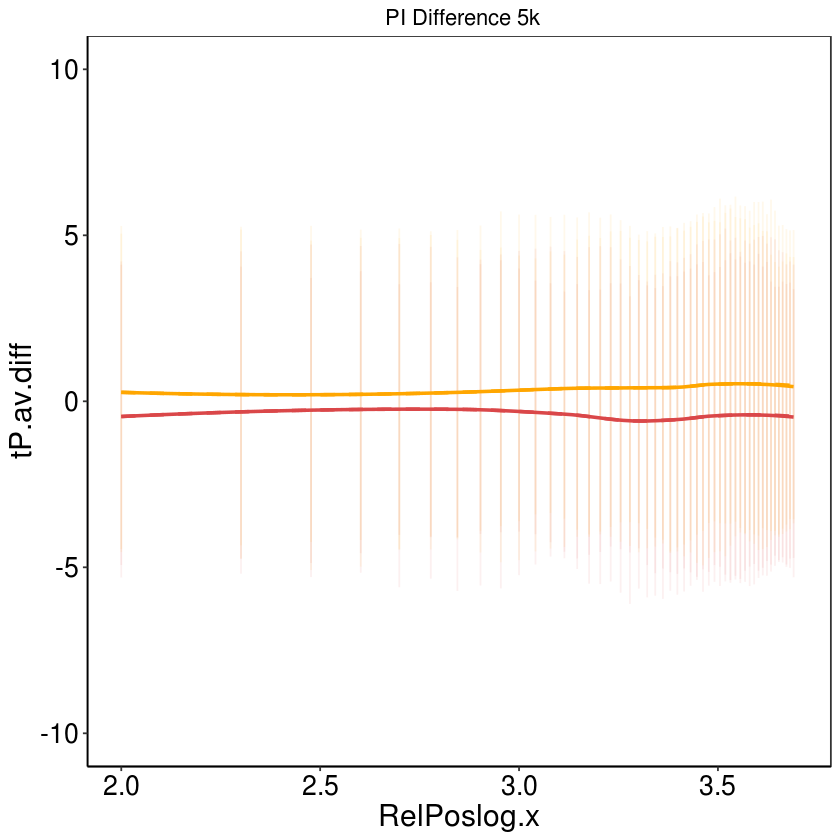

In [56]:
print(ggplot()+ theme_bw()
       + theme( panel.grid.minor = element_blank(), panel.grid.major = element_blank(), axis.line=element_line(color="black"), 
             axis.text=element_text(color="black", size=16), 
             axis.title=element_text(size=18),
            legend.text=element_text(size=14))    
     +ggtitle(" PI Difference 5k")
      +theme(plot.title = element_text(hjust = 0.5))
        + geom_linerange(data=NY_av_50k, aes(x=RelPoslog.x, ymax = NY_av_50k$tP.av.diff+NY_av_50k$tP.stdev.x, ymin = NY_av_50k$tP.av.diff-NY_av_50k$tP.stdev.y), alpha = 0.08, col="#da4749")
        + geom_linerange(data=NJ_av_50k, aes(x=RelPoslog.x, ymax = NJ_av_50k$tP.av.diff+NJ_av_50k$tP.stdev.x, ymin = NJ_av_50k$tP.av.diff-NJ_av_50k$tP.stdev.y), alpha = 0.08, col="#ffa600")
        #+ geom_linerange(data=VT_av_50k, aes(x=RelPoslog.x, ymax = VT_av_50k$tP.av.diff+NY_av_50k$tP.stdev.x, ymin = VT_av_50k$tP.av.diff-VT_av_50k$tP.stdev.y), alpha = 0.08, col="#5f72b7")
        + geom_smooth(data=NJ_av_50k, method="loess", col="#ffa600", se=FALSE, formula=y~x, aes(x=RelPoslog.x, y=tP.av.diff))
        + geom_smooth(data=NY_av_50k, method="loess", col="#da4749", se=FALSE, formula=y~x, aes(x=RelPoslog.x, y=tP.av.diff))
        #+ geom_smooth(data=VT_av_50k, method="loess", col="#5f72b7", se=FALSE, formula=y~x, aes(x=RelPoslog.x, y=tP.av.diff))  
        + geom_smooth(data=NJN_av_50k, method="loess", col="#ffa600",  linetype="dashed", se=FALSE, formula=y~x, aes(x=RelPoslog.x, y=tP.av.diff))
        + geom_smooth(data=NYN_av_50k, method="loess", col="#da4749",  linetype="dashed", se=FALSE, formula=y~x, aes(x=RelPoslog.x, y=tP.av.diff))
        #+ geom_smooth(data=VTN_av_50k, method="loess", col="#5f72b7",  linetype="dashed", se=FALSE, formula=y~x, aes(x=RelPoslog.x, y=tP.av.diff))
     + ylim(-10, 10)
     )

In [57]:
ggsave("/local/home/sarahgw/WGS/SNPS/All_mylu/plots/Pdiff5k_nr.pdf", h=5, w=8) 

Warning message:
“Removed 1 rows containing non-finite values (stat_smooth).”Warning message:
“Removed 1 rows containing non-finite values (stat_smooth).”Warning message:
“Removed 1 rows containing non-finite values (stat_smooth).”Warning message:
“Removed 1 rows containing non-finite values (stat_smooth).”

Warning message:
“Removed 1 rows containing non-finite values (stat_smooth).”Warning message:
“Removed 1 rows containing non-finite values (stat_smooth).”Warning message:
“Removed 1 rows containing non-finite values (stat_smooth).”Warning message:
“Removed 1 rows containing non-finite values (stat_smooth).”Warning message:
“Removed 1 rows containing non-finite values (stat_smooth).”Warning message:
“Removed 1 rows containing non-finite values (stat_smooth).”

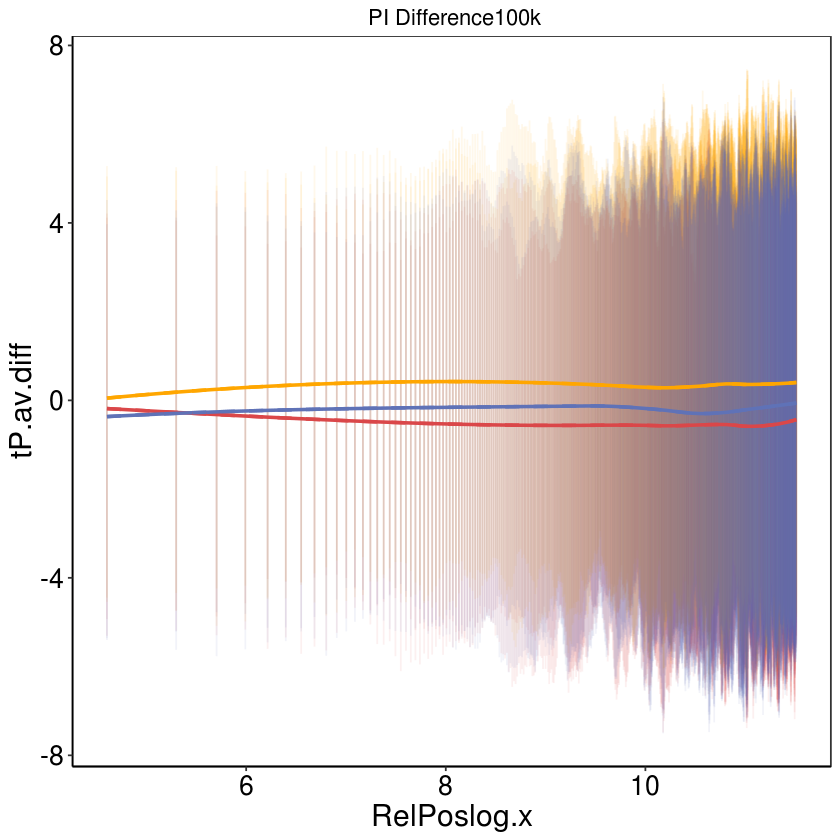

Warning message:
“Removed 1 rows containing non-finite values (stat_smooth).”Warning message:
“Removed 1 rows containing non-finite values (stat_smooth).”Warning message:
“Removed 1 rows containing non-finite values (stat_smooth).”Warning message:
“Removed 1 rows containing non-finite values (stat_smooth).”Warning message:
“Removed 1 rows containing non-finite values (stat_smooth).”Warning message:
“Removed 1 rows containing non-finite values (stat_smooth).”

Warning message:
“Removed 1 rows containing non-finite values (stat_smooth).”Warning message:
“Removed 1 rows containing non-finite values (stat_smooth).”Warning message:
“Removed 1 rows containing non-finite values (stat_smooth).”Warning message:
“Removed 1 rows containing non-finite values (stat_smooth).”Warning message:
“Removed 1 rows containing non-finite values (stat_smooth).”Warning message:
“Removed 1 rows containing non-finite values (stat_smooth).”

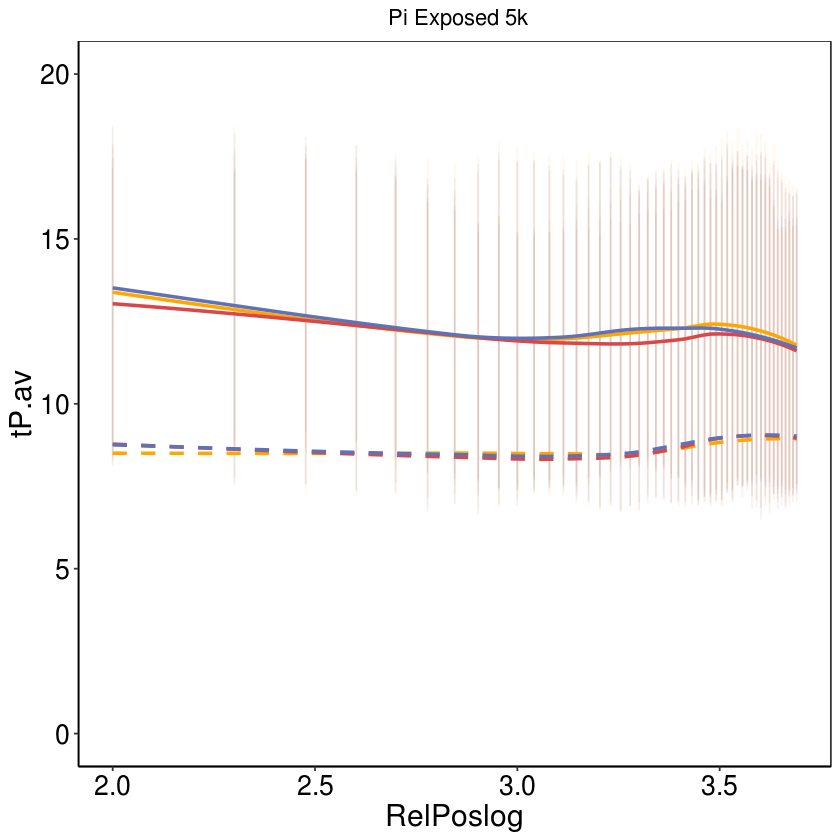

In [58]:
print(ggplot()+ theme_bw()
              + theme( panel.grid.minor = element_blank(), panel.grid.major = element_blank(), axis.line=element_line(color="black"), 
             axis.text=element_text(color="black", size=16), 
             axis.title=element_text(size=18),
            legend.text=element_text(size=14))  
      + ggtitle(" Pi Exposed 5k")+theme(plot.title = element_text(hjust = 0.5))
    + geom_linerange(data=NYE_av_50k, aes(x=RelPoslog, ymax = NYE_av_50k$tP.av+NYE_av_50k$tP.stdev, ymin = NYE_av_50k$tP.av-NYE_av_50k$tP.stdev), alpha = 0.08, col="#da4749")
    + geom_linerange(data=NJE_av_50k, aes(x=RelPoslog, ymax = NJE_av_50k$tP.av+NJE_av_50k$tP.stdev, ymin = NJE_av_50k$tP.av-NJE_av_50k$tP.stdev), alpha = 0.08, col="#ffa600")
    + geom_linerange(data=VTE_av_50k, aes(x=RelPoslog, ymax = VTE_av_50k$tP.av+NYE_av_50k$tP.stdev, ymin = VTE_av_50k$tP.av-VTE_av_50k$tP.stdev), alpha = 0.08, col="#5f72b7")
    + geom_smooth(data=NJE_av_50k, method="loess", col="#ffa600", se=FALSE, formula=y~x, aes(x=RelPoslog, y=tP.av))
    + geom_smooth(data=NYE_av_50k, method="loess", col="#da4749", se=FALSE, formula=y~x, aes(x=RelPoslog, y=tP.av))
    + geom_smooth(data=VTE_av_50k, method="loess", col="#5f72b7", se=FALSE, formula=y~x, aes(x=RelPoslog, y=tP.av))
    + geom_smooth(data=NJEN_av_50k, method="loess", col="#ffa600", se=FALSE, linetype="dashed", formula=y~x, aes(x=RelPoslog, y=tP.av))
    + geom_smooth(data=NYEN_av_50k, method="loess", col="#da4749", se=FALSE, linetype="dashed", formula=y~x, aes(x=RelPoslog, y=tP.av))
    + geom_smooth(data=VTEN_av_50k, method="loess", col="#5f72b7", se=FALSE, linetype="dashed", formula=y~x, aes(x=RelPoslog, y=tP.av))
    + ylim(0, 20))

In [59]:
ggsave("/local/home/sarahgw/WGS/SNPS/All_mylu/plots/PE5k_nr.pdf", h=5, w=8) 

Warning message:
“Removed 1 rows containing non-finite values (stat_smooth).”Warning message:
“Removed 1 rows containing non-finite values (stat_smooth).”Warning message:
“Removed 1 rows containing non-finite values (stat_smooth).”Warning message:
“Removed 1 rows containing non-finite values (stat_smooth).”Warning message:
“Removed 1 rows containing non-finite values (stat_smooth).”Warning message:
“Removed 1 rows containing non-finite values (stat_smooth).”

Warning message:
“Removed 1 rows containing non-finite values (stat_smooth).”Warning message:
“Removed 1 rows containing non-finite values (stat_smooth).”Warning message:
“Removed 1 rows containing non-finite values (stat_smooth).”Warning message:
“Removed 1 rows containing non-finite values (stat_smooth).”Warning message:
“Removed 1 rows containing non-finite values (stat_smooth).”Warning message:
“Removed 1 rows containing non-finite values (stat_smooth).”

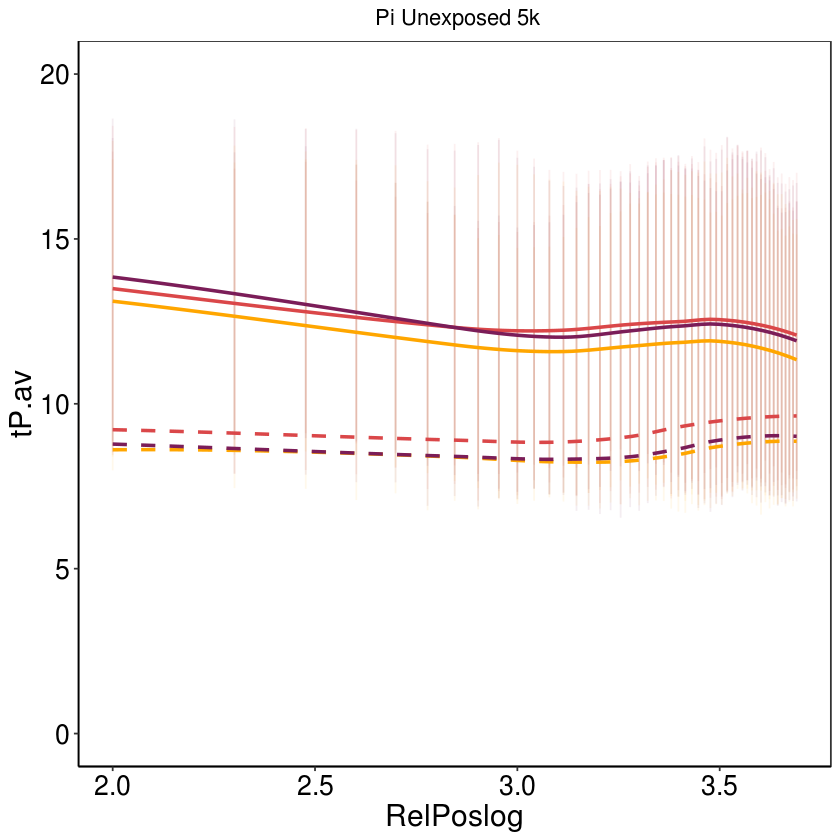

In [60]:
print(ggplot()+ theme_bw()
           + theme( panel.grid.minor = element_blank(), panel.grid.major = element_blank(), axis.line=element_line(color="black"), 
             axis.text=element_text(color="black", size=16), 
             axis.title=element_text(size=18),
            legend.text=element_text(size=14))  
      + ggtitle(" Pi Unexposed 5k")+theme(plot.title = element_text(hjust = 0.5))
    + geom_linerange(data=NYU_av_50k, aes(x=RelPoslog, ymax = NYU_av_50k$tP.av+NYU_av_50k$tP.stdev, ymin = NYU_av_50k$tP.av-NYU_av_50k$tP.stdev), alpha = 0.08, col="#da4749")
    + geom_linerange(data=NJU_av_50k, aes(x=RelPoslog, ymax = NJU_av_50k$tP.av+NJU_av_50k$tP.stdev, ymin = NJU_av_50k$tP.av-NJU_av_50k$tP.stdev), alpha = 0.08, col="#ffa600")
    + geom_linerange(data=VTU_av_50k, aes(x=RelPoslog, ymax = VTU_av_50k$tP.av+NYU_av_50k$tP.stdev, ymin = VTU_av_50k$tP.av-VTU_av_50k$tP.stdev), alpha = 0.08, col="#7b1d58")
    + geom_smooth(data=NJU_av_50k, method="loess", col="#ffa600", se=FALSE, formula=y~x, aes(x=RelPoslog, y=tP.av))
    + geom_smooth(data=NYU_av_50k, method="loess", col="#da4749", se=FALSE, formula=y~x, aes(x=RelPoslog, y=tP.av))
    + geom_smooth(data=VTU_av_50k, method="loess", col="#7b1d58", se=FALSE, formula=y~x, aes(x=RelPoslog, y=tP.av))
    + geom_smooth(data=NJUN_av_50k, method="loess", col="#ffa600", se=FALSE, linetype="dashed", formula=y~x, aes(x=RelPoslog, y=tP.av))
    + geom_smooth(data=NYUN_av_50k, method="loess", col="#da4749", se=FALSE, linetype="dashed", formula=y~x, aes(x=RelPoslog, y=tP.av))
    + geom_smooth(data=VTUN_av_50k, method="loess", col="#7b1d58", se=FALSE, linetype="dashed", formula=y~x, aes(x=RelPoslog, y=tP.av))
    +ylim(0,20))

In [61]:
ggsave("/local/home/sarahgw/WGS/SNPS/All_mylu/plots/PU5k_nr.pdf", h=5, w=8) 

Warning message:
“Removed 1 rows containing non-finite values (stat_smooth).”Warning message:
“Removed 1 rows containing non-finite values (stat_smooth).”Warning message:
“Removed 1 rows containing non-finite values (stat_smooth).”Warning message:
“Removed 1 rows containing non-finite values (stat_smooth).”Warning message:
“Removed 1 rows containing non-finite values (stat_smooth).”Warning message:
“Removed 1 rows containing non-finite values (stat_smooth).”

# 50 kbasepairs

In [62]:
NJE_av_50k=NJE_av[abs(NJE_av$RelPosRound)<50000,]
NJU_av_50k=NJU_av[abs(NJU_av$RelPosRound)<50000,]
NYE_av_50k=NYE_av[abs(NYE_av$RelPosRound)<50000,]
NYU_av_50k=NYU_av[abs(NYU_av$RelPosRound)<50000,]
VTE_av_50k=VTE_av[abs(VTE_av$RelPosRound)<50000,]
VTU_av_50k=VTU_av[abs(VTU_av$RelPosRound)<50000,]

NJEN_av_50k=NJEN_av[abs(NJEN_av$RelPosRound)<50000,]
NJUN_av_50k=NJUN_av[abs(NJUN_av$RelPosRound)<50000,]
NYEN_av_50k=NYEN_av[abs(NYEN_av$RelPosRound)<50000,]
NYUN_av_50k=NYUN_av[abs(NYUN_av$RelPosRound)<50000,]
VTEN_av_50k=VTEN_av[abs(VTEN_av$RelPosRound)<50000,]
VTUN_av_50k=VTUN_av[abs(VTUN_av$RelPosRound)<50000,]

Warning message:
“Removed 1 rows containing non-finite values (stat_smooth).”Warning message:
“Removed 1 rows containing non-finite values (stat_smooth).”Warning message:
“Removed 1 rows containing non-finite values (stat_smooth).”Warning message:
“Removed 1 rows containing non-finite values (stat_smooth).”Warning message:
“Removed 1 rows containing non-finite values (stat_smooth).”Warning message:
“Removed 1 rows containing non-finite values (stat_smooth).”

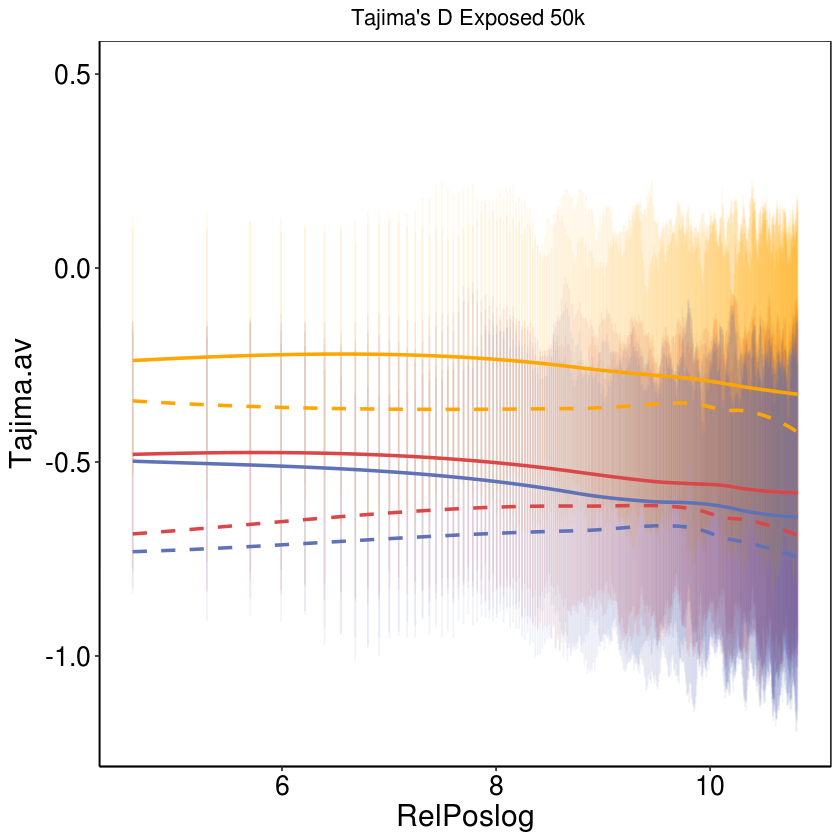

In [76]:
print(ggplot()+ theme_bw()
               + theme( panel.grid.minor = element_blank(), panel.grid.major = element_blank(), axis.line=element_line(color="black"), 
             axis.text=element_text(color="black", size=16), 
             axis.title=element_text(size=18),
            legend.text=element_text(size=14))  
      + ggtitle(" Tajima's D Exposed 50k")+theme(plot.title = element_text(hjust = 0.5))
        + geom_linerange(data=NYE_av_50k, aes(x=RelPoslog, ymax = NYE_av_50k$Tajima.av+NYE_av_50k$Tajima.stdev, ymin = NYE_av_50k$Tajima.av-NYE_av_50k$Tajima.stdev), alpha = 0.08, col="#da4749")
    + geom_linerange(data=NJE_av_50k, aes(x=RelPoslog, ymax = NJE_av_50k$Tajima.av+NJE_av_50k$Tajima.stdev, ymin = NJE_av_50k$Tajima.av-NJE_av_50k$Tajima.stdev), alpha = 0.08, col="#ffa600")
          + geom_linerange(data=VTE_av_50k, aes(x=RelPoslog, ymax = VTE_av_50k$Tajima.av+NYE_av_50k$Tajima.stdev, ymin = VTE_av_50k$Tajima.av-VTE_av_50k$Tajima.stdev), alpha = 0.08, col="#5f72b7")
      + geom_smooth(data=NJE_av_50k, method="loess", col="#ffa600", se=FALSE, formula=y~x, aes(x=RelPoslog, y=Tajima.av))
    + geom_smooth(data=NYE_av_50k, method="loess", col="#da4749", se=FALSE, formula=y~x, aes(x=RelPoslog, y=Tajima.av))
    + geom_smooth(data=VTE_av_50k, method="loess", col="#5f72b7", se=FALSE, formula=y~x, aes(x=RelPoslog, y=Tajima.av))
  + geom_smooth(data=NJEN_av_50k, method="loess", col="#ffa600",  linetype="dashed", se=FALSE, formula=y~x, aes(x=RelPoslog, y=Tajima.av))
    + geom_smooth(data=NYEN_av_50k, method="loess", col="#da4749",  linetype="dashed", se=FALSE, formula=y~x, aes(x=RelPoslog, y=Tajima.av))
    + geom_smooth(data=VTEN_av_50k, method="loess", col="#5f72b7",  linetype="dashed", se=FALSE, formula=y~x, aes(x=RelPoslog, y=Tajima.av))
      + ylim(-1.2, .5)
     )

In [77]:
ggsave("/local/home/sarahgw/WGS/SNPS/All_mylu/plots/TE50k_nr.pdf", h=5, w=8) 

Warning message:
“Removed 1 rows containing non-finite values (stat_smooth).”Warning message:
“Removed 1 rows containing non-finite values (stat_smooth).”Warning message:
“Removed 1 rows containing non-finite values (stat_smooth).”Warning message:
“Removed 1 rows containing non-finite values (stat_smooth).”Warning message:
“Removed 1 rows containing non-finite values (stat_smooth).”Warning message:
“Removed 1 rows containing non-finite values (stat_smooth).”

Warning message:
“Removed 1 rows containing non-finite values (stat_smooth).”Warning message:
“Removed 1 rows containing non-finite values (stat_smooth).”Warning message:
“Removed 1 rows containing non-finite values (stat_smooth).”Warning message:
“Removed 1 rows containing non-finite values (stat_smooth).”Warning message:
“Removed 1 rows containing non-finite values (stat_smooth).”Warning message:
“Removed 1 rows containing non-finite values (stat_smooth).”

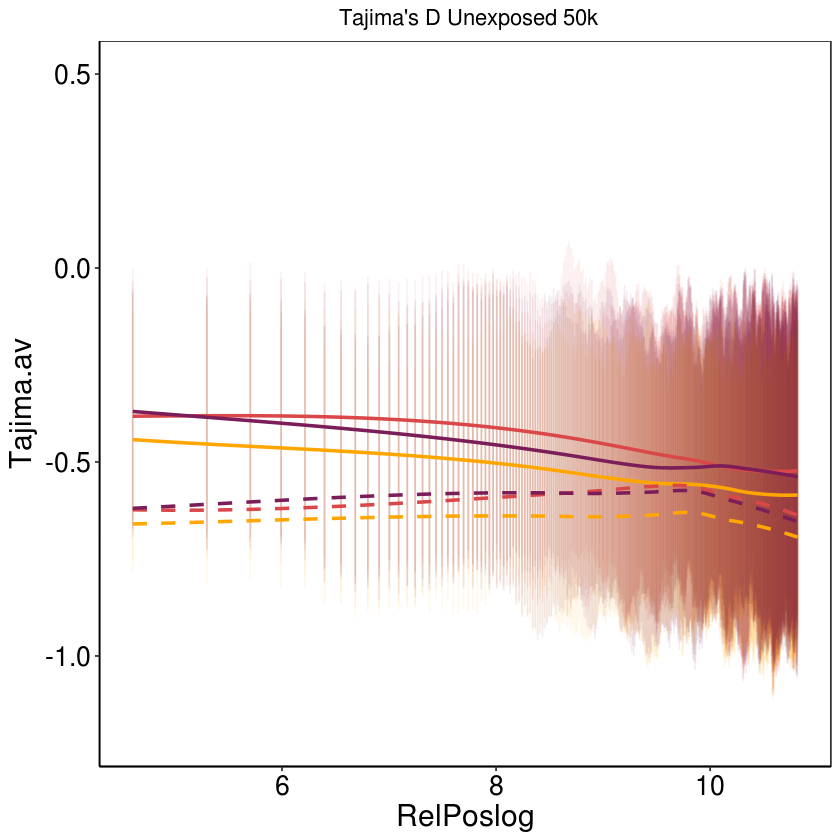

In [78]:
print(ggplot()+ theme_bw()
           + theme( panel.grid.minor = element_blank(), panel.grid.major = element_blank(), axis.line=element_line(color="black"), 
             axis.text=element_text(color="black", size=16), 
             axis.title=element_text(size=18),
            legend.text=element_text(size=14))  
      + ggtitle(" Tajima's D Unexposed 50k")+theme(plot.title = element_text(hjust = 0.5))
        + geom_linerange(data=NYU_av_50k, aes(x=RelPoslog, ymax = NYU_av_50k$Tajima.av+NYU_av_50k$Tajima.stdev, ymin = NYU_av_50k$Tajima.av-NYU_av_50k$Tajima.stdev), alpha = 0.08, col="#da4749")
    + geom_linerange(data=NJU_av_50k, aes(x=RelPoslog, ymax = NJU_av_50k$Tajima.av+NJU_av_50k$Tajima.stdev, ymin = NJU_av_50k$Tajima.av-NJU_av_50k$Tajima.stdev), alpha = 0.08, col="#ffa600")
          + geom_linerange(data=VTU_av_50k, aes(x=RelPoslog, ymax = VTU_av_50k$Tajima.av+NYU_av_50k$Tajima.stdev, ymin = VTU_av_50k$Tajima.av-VTU_av_50k$Tajima.stdev), alpha = 0.08, col="#7b1d58")
      + geom_smooth(data=NJU_av_50k, method="loess", col="#ffa600", se=FALSE, formula=y~x, aes(x=RelPoslog, y=Tajima.av))
    + geom_smooth(data=NYU_av_50k, method="loess", col="#da4749", se=FALSE, formula=y~x, aes(x=RelPoslog, y=Tajima.av))
    + geom_smooth(data=VTU_av_50k, method="loess", col="#7b1d58", se=FALSE, formula=y~x, aes(x=RelPoslog, y=Tajima.av))
      + geom_smooth(data=NJUN_av_50k, method="loess", col="#ffa600",  linetype="dashed", se=FALSE, formula=y~x, aes(x=RelPoslog, y=Tajima.av))
    + geom_smooth(data=NYUN_av_50k, method="loess", col="#da4749",  linetype="dashed", se=FALSE, formula=y~x, aes(x=RelPoslog, y=Tajima.av))
    + geom_smooth(data=VTUN_av_50k, method="loess", col="#7b1d58",  linetype="dashed", se=FALSE, formula=y~x, aes(x=RelPoslog, y=Tajima.av))
      + ylim(-1.2, .5))

In [79]:
ggsave("/local/home/sarahgw/WGS/SNPS/All_mylu/plots/TU50k_nr.pdf", h=5, w=8) 

Warning message:
“Removed 1 rows containing non-finite values (stat_smooth).”Warning message:
“Removed 1 rows containing non-finite values (stat_smooth).”Warning message:
“Removed 1 rows containing non-finite values (stat_smooth).”Warning message:
“Removed 1 rows containing non-finite values (stat_smooth).”Warning message:
“Removed 1 rows containing non-finite values (stat_smooth).”Warning message:
“Removed 1 rows containing non-finite values (stat_smooth).”

Warning message:
“Removed 1 rows containing non-finite values (stat_smooth).”Warning message:
“Removed 1 rows containing non-finite values (stat_smooth).”Warning message:
“Removed 1 rows containing non-finite values (stat_smooth).”Warning message:
“Removed 1 rows containing non-finite values (stat_smooth).”Warning message:
“Removed 1 rows containing non-finite values (stat_smooth).”Warning message:
“Removed 1 rows containing non-finite values (stat_smooth).”

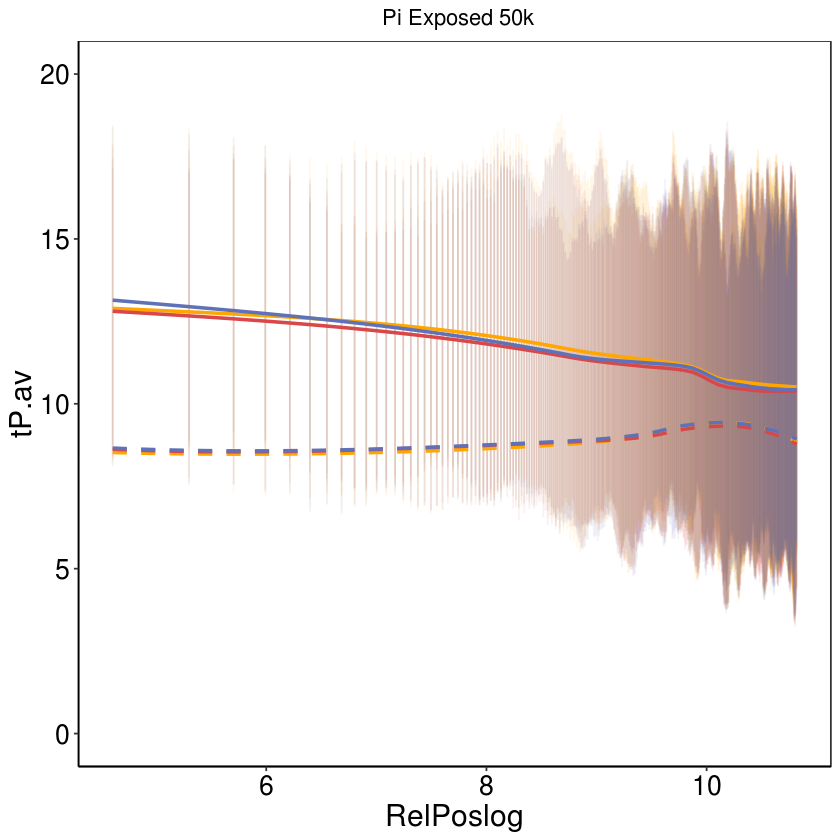

In [80]:
print(ggplot()+ theme_bw()
              + theme( panel.grid.minor = element_blank(), panel.grid.major = element_blank(), axis.line=element_line(color="black"), 
             axis.text=element_text(color="black", size=16), 
             axis.title=element_text(size=18),
            legend.text=element_text(size=14))  
      + ggtitle(" Pi Exposed 50k")+theme(plot.title = element_text(hjust = 0.5))
    + geom_linerange(data=NYE_av_50k, aes(x=RelPoslog, ymax = NYE_av_50k$tP.av+NYE_av_50k$tP.stdev, ymin = NYE_av_50k$tP.av-NYE_av_50k$tP.stdev), alpha = 0.08, col="#da4749")
    + geom_linerange(data=NJE_av_50k, aes(x=RelPoslog, ymax = NJE_av_50k$tP.av+NJE_av_50k$tP.stdev, ymin = NJE_av_50k$tP.av-NJE_av_50k$tP.stdev), alpha = 0.08, col="#ffa600")
    + geom_linerange(data=VTE_av_50k, aes(x=RelPoslog, ymax = VTE_av_50k$tP.av+NYE_av_50k$tP.stdev, ymin = VTE_av_50k$tP.av-VTE_av_50k$tP.stdev), alpha = 0.08, col="#5f72b7")
    + geom_smooth(data=NJE_av_50k, method="loess", col="#ffa600", se=FALSE, formula=y~x, aes(x=RelPoslog, y=tP.av))
    + geom_smooth(data=NYE_av_50k, method="loess", col="#da4749", se=FALSE, formula=y~x, aes(x=RelPoslog, y=tP.av))
    + geom_smooth(data=VTE_av_50k, method="loess", col="#5f72b7", se=FALSE, formula=y~x, aes(x=RelPoslog, y=tP.av))
    + geom_smooth(data=NJEN_av_50k, method="loess", col="#ffa600", se=FALSE, linetype="dashed", formula=y~x, aes(x=RelPoslog, y=tP.av))
    + geom_smooth(data=NYEN_av_50k, method="loess", col="#da4749", se=FALSE, linetype="dashed", formula=y~x, aes(x=RelPoslog, y=tP.av))
    + geom_smooth(data=VTEN_av_50k, method="loess", col="#5f72b7", se=FALSE, linetype="dashed", formula=y~x, aes(x=RelPoslog, y=tP.av))
    + ylim(0, 20))

In [81]:
ggsave("/local/home/sarahgw/WGS/SNPS/All_mylu/plots/PE50k_nr.pdf", h=5, w=8) 

Warning message:
“Removed 1 rows containing non-finite values (stat_smooth).”Warning message:
“Removed 1 rows containing non-finite values (stat_smooth).”Warning message:
“Removed 1 rows containing non-finite values (stat_smooth).”Warning message:
“Removed 1 rows containing non-finite values (stat_smooth).”Warning message:
“Removed 1 rows containing non-finite values (stat_smooth).”Warning message:
“Removed 1 rows containing non-finite values (stat_smooth).”

Warning message:
“Removed 1 rows containing non-finite values (stat_smooth).”Warning message:
“Removed 1 rows containing non-finite values (stat_smooth).”Warning message:
“Removed 1 rows containing non-finite values (stat_smooth).”Warning message:
“Removed 1 rows containing non-finite values (stat_smooth).”Warning message:
“Removed 1 rows containing non-finite values (stat_smooth).”Warning message:
“Removed 1 rows containing non-finite values (stat_smooth).”

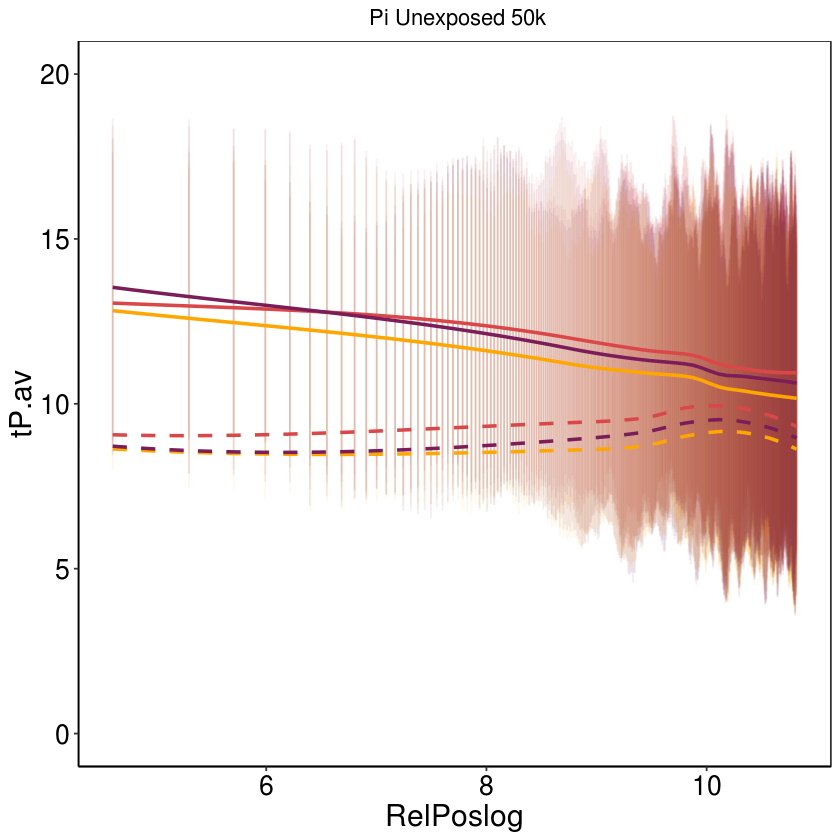

In [82]:
print(ggplot()+ theme_bw()
               + theme( panel.grid.minor = element_blank(), panel.grid.major = element_blank(), axis.line=element_line(color="black"), 
             axis.text=element_text(color="black", size=16), 
             axis.title=element_text(size=18),
            legend.text=element_text(size=14))  
      + ggtitle(" Pi Unexposed 50k")+theme(plot.title = element_text(hjust = 0.5))
    + geom_linerange(data=NYU_av_50k, aes(x=RelPoslog, ymax = NYU_av_50k$tP.av+NYU_av_50k$tP.stdev, ymin = NYU_av_50k$tP.av-NYU_av_50k$tP.stdev), alpha = 0.08, col="#da4749")
    + geom_linerange(data=NJU_av_50k, aes(x=RelPoslog, ymax = NJU_av_50k$tP.av+NJU_av_50k$tP.stdev, ymin = NJU_av_50k$tP.av-NJU_av_50k$tP.stdev), alpha = 0.08, col="#ffa600")
    + geom_linerange(data=VTU_av_50k, aes(x=RelPoslog, ymax = VTU_av_50k$tP.av+NYU_av_50k$tP.stdev, ymin = VTU_av_50k$tP.av-VTU_av_50k$tP.stdev), alpha = 0.08, col="#7b1d58")
    + geom_smooth(data=NJU_av_50k, method="loess", col="#ffa600", se=FALSE, formula=y~x, aes(x=RelPoslog, y=tP.av))
    + geom_smooth(data=NYU_av_50k, method="loess", col="#da4749", se=FALSE, formula=y~x, aes(x=RelPoslog, y=tP.av))
    + geom_smooth(data=VTU_av_50k, method="loess", col="#7b1d58", se=FALSE, formula=y~x, aes(x=RelPoslog, y=tP.av))
    + geom_smooth(data=NJUN_av_50k, method="loess", col="#ffa600", se=FALSE, linetype="dashed", formula=y~x, aes(x=RelPoslog, y=tP.av))
    + geom_smooth(data=NYUN_av_50k, method="loess", col="#da4749", se=FALSE, linetype="dashed", formula=y~x, aes(x=RelPoslog, y=tP.av))
    + geom_smooth(data=VTUN_av_50k, method="loess", col="#7b1d58", se=FALSE, linetype="dashed", formula=y~x, aes(x=RelPoslog, y=tP.av))
    +ylim(0,20))

In [83]:
ggsave("/local/home/sarahgw/WGS/SNPS/All_mylu/plots/PU50k_nr.pdf", h=5, w=8) 

Warning message:
“Removed 1 rows containing non-finite values (stat_smooth).”Warning message:
“Removed 1 rows containing non-finite values (stat_smooth).”Warning message:
“Removed 1 rows containing non-finite values (stat_smooth).”Warning message:
“Removed 1 rows containing non-finite values (stat_smooth).”Warning message:
“Removed 1 rows containing non-finite values (stat_smooth).”Warning message:
“Removed 1 rows containing non-finite values (stat_smooth).”

# one hundred kbasepairs

In [63]:
NJE_av_50k=NJE_av[abs(NJE_av$RelPosRound)<100000,]
NJU_av_50k=NJU_av[abs(NJU_av$RelPosRound)<100000,]
NYE_av_50k=NYE_av[abs(NYE_av$RelPosRound)<100000,]
NYU_av_50k=NYU_av[abs(NYU_av$RelPosRound)<100000,]
VTE_av_50k=VTE_av[abs(VTE_av$RelPosRound)<100000,]
VTU_av_50k=VTU_av[abs(VTU_av$RelPosRound)<100000,]

NJEN_av_50k=NJEN_av[abs(NJEN_av$RelPosRound)<100000,]
NJUN_av_50k=NJUN_av[abs(NJUN_av$RelPosRound)<100000,]
NYEN_av_50k=NYEN_av[abs(NYEN_av$RelPosRound)<100000,]
NYUN_av_50k=NYUN_av[abs(NYUN_av$RelPosRound)<100000,]
VTEN_av_50k=VTEN_av[abs(VTEN_av$RelPosRound)<100000,]
VTUN_av_50k=VTUN_av[abs(VTUN_av$RelPosRound)<100000,]

In [64]:
NJ_av_50k=NJ_av[abs(NJ_av$RelPosRound)<100000,]
NY_av_50k=NY_av[abs(NY_av$RelPosRound)<100000,]
VT_av_50k=VT_av[abs(VT_av$RelPosRound)<100000,]

NJN_av_50k=NJ_av[abs(NJN_av$RelPosRound)<100000,]
NYN_av_50k=NY_av[abs(NYN_av$RelPosRound)<100000,]
VTN_av_50k=VT_av[abs(VTN_av$RelPosRound)<100000,]

Warning message:
“Removed 1 rows containing non-finite values (stat_smooth).”Warning message:
“Removed 1 rows containing non-finite values (stat_smooth).”Warning message:
“Removed 1 rows containing non-finite values (stat_smooth).”Warning message:
“Removed 1 rows containing non-finite values (stat_smooth).”

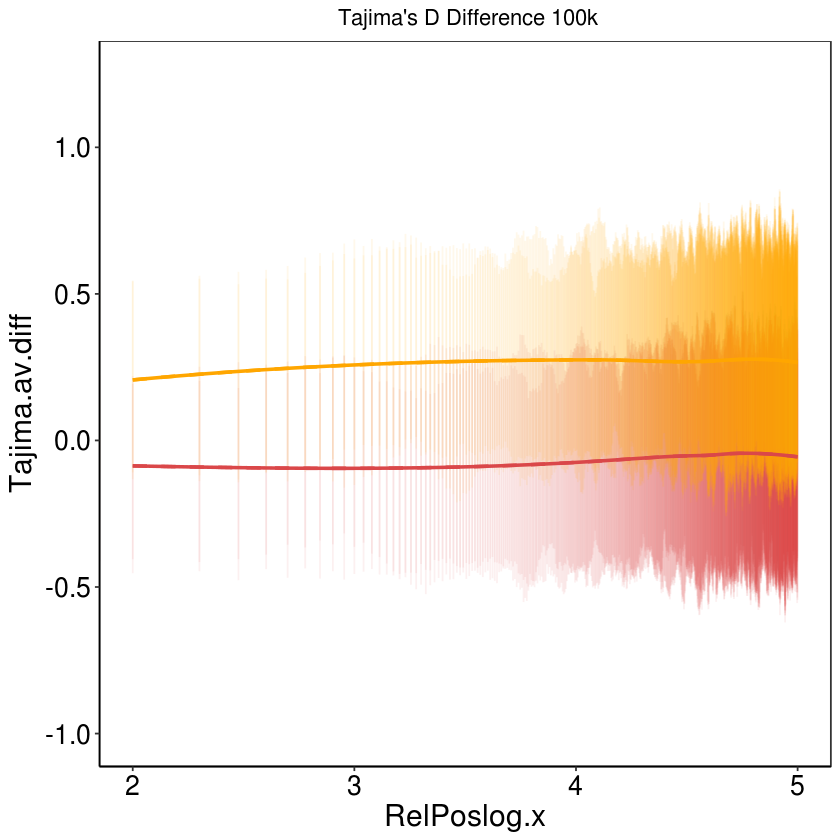

In [65]:
print(ggplot()+ theme_bw()
       + theme( panel.grid.minor = element_blank(), panel.grid.major = element_blank(), axis.line=element_line(color="black"), 
             axis.text=element_text(color="black", size=16), 
             axis.title=element_text(size=18),
            legend.text=element_text(size=14))    
     +ggtitle(" Tajima's D Difference 100k")
      +theme(plot.title = element_text(hjust = 0.5))
        + geom_linerange(data=NY_av_50k, aes(x=RelPoslog.x, ymax = NY_av_50k$Tajima.av.diff+NY_av_50k$Tajima.stdev.x, ymin = NY_av_50k$Tajima.av.diff-NY_av_50k$Tajima.stdev.y), alpha = 0.08, col="#da4749")
        + geom_linerange(data=NJ_av_50k, aes(x=RelPoslog.x, ymax = NJ_av_50k$Tajima.av.diff+NJ_av_50k$Tajima.stdev.x, ymin = NJ_av_50k$Tajima.av.diff-NJ_av_50k$Tajima.stdev.y), alpha = 0.08, col="#ffa600")
        #+ geom_linerange(data=VT_av_50k, aes(x=RelPoslog.x, ymax = VT_av_50k$Tajima.av.diff+NY_av_50k$Tajima.stdev.x, ymin = VT_av_50k$Tajima.av.diff-VT_av_50k$Tajima.stdev.y), alpha = 0.08, col="#5f72b7")
        + geom_smooth(data=NJ_av_50k, method="loess", col="#ffa600", se=FALSE, formula=y~x, aes(x=RelPoslog.x, y=Tajima.av.diff))
        + geom_smooth(data=NY_av_50k, method="loess", col="#da4749", se=FALSE, formula=y~x, aes(x=RelPoslog.x, y=Tajima.av.diff))
        #+ geom_smooth(data=VT_av_50k, method="loess", col="#5f72b7", se=FALSE, formula=y~x, aes(x=RelPoslog.x, y=Tajima.av.diff))  
        + geom_smooth(data=NJN_av_50k, method="loess", col="#ffa600",  linetype="dashed", se=FALSE, formula=y~x, aes(x=RelPoslog.x, y=Tajima.av.diff))
        + geom_smooth(data=NYN_av_50k, method="loess", col="#da4749",  linetype="dashed", se=FALSE, formula=y~x, aes(x=RelPoslog.x, y=Tajima.av.diff))
        #+ geom_smooth(data=VTN_av_50k, method="loess", col="#5f72b7",  linetype="dashed", se=FALSE, formula=y~x, aes(x=RelPoslog.x, y=Tajima.av.diff))
      + ylim(-1, 1.25)
     )

In [66]:
ggsave("/local/home/sarahgw/WGS/SNPS/All_mylu/plots/Tdiff100k_nr.pdf", h=5, w=8) 

Warning message:
“Removed 1 rows containing non-finite values (stat_smooth).”Warning message:
“Removed 1 rows containing non-finite values (stat_smooth).”Warning message:
“Removed 1 rows containing non-finite values (stat_smooth).”Warning message:
“Removed 1 rows containing non-finite values (stat_smooth).”

Warning message:
“Removed 1 rows containing non-finite values (stat_smooth).”Warning message:
“Removed 1 rows containing non-finite values (stat_smooth).”Warning message:
“Removed 1 rows containing non-finite values (stat_smooth).”Warning message:
“Removed 1 rows containing non-finite values (stat_smooth).”Warning message:
“Removed 1 rows containing non-finite values (stat_smooth).”Warning message:
“Removed 1 rows containing non-finite values (stat_smooth).”Warning message:
“Removed 11 rows containing missing values (geom_linerange).”

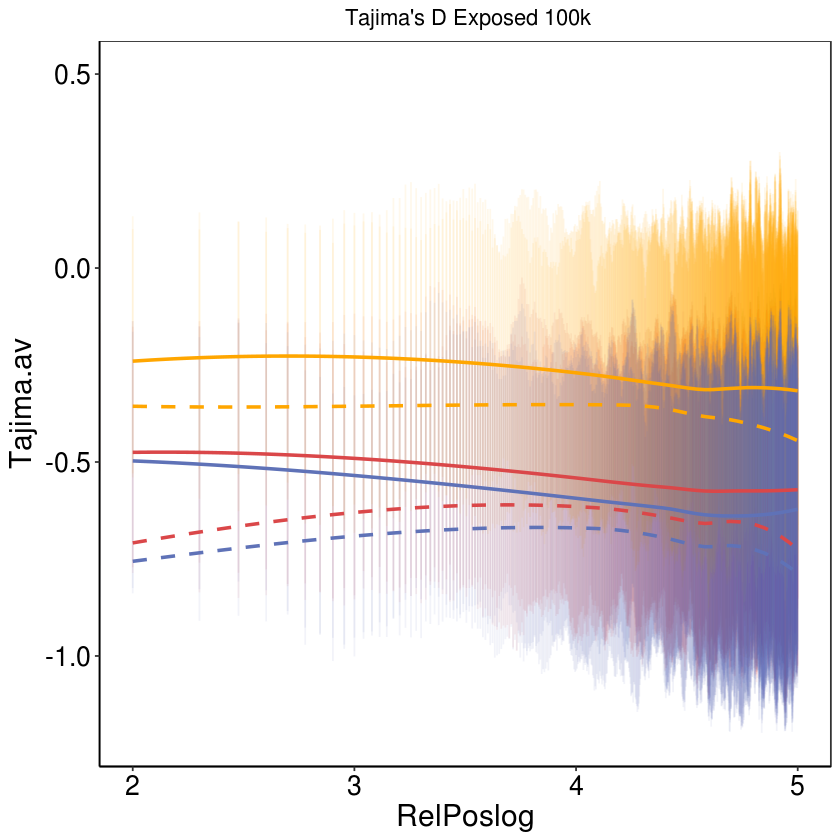

In [67]:
print(ggplot()+ theme_bw()
             + theme( panel.grid.minor = element_blank(), panel.grid.major = element_blank(), axis.line=element_line(color="black"), 
             axis.text=element_text(color="black", size=16), 
             axis.title=element_text(size=18),
            legend.text=element_text(size=14))  
      + ggtitle(" Tajima's D Exposed 100k")+theme(plot.title = element_text(hjust = 0.5))
    + geom_linerange(data=NYE_av_50k, aes(x=RelPoslog, ymax = NYE_av_50k$Tajima.av+NYE_av_50k$Tajima.stdev, ymin = NYE_av_50k$Tajima.av-NYE_av_50k$Tajima.stdev), alpha = 0.08, col="#da4749")
    + geom_linerange(data=NJE_av_50k, aes(x=RelPoslog, ymax = NJE_av_50k$Tajima.av+NJE_av_50k$Tajima.stdev, ymin = NJE_av_50k$Tajima.av-NJE_av_50k$Tajima.stdev), alpha = 0.08, col="#ffa600")
    + geom_linerange(data=VTE_av_50k, aes(x=RelPoslog, ymax = VTE_av_50k$Tajima.av+NYE_av_50k$Tajima.stdev, ymin = VTE_av_50k$Tajima.av-VTE_av_50k$Tajima.stdev), alpha = 0.08, col="#5f72b7")
    + geom_smooth(data=NJE_av_50k, method="loess", col="#ffa600", se=FALSE, formula=y~x, aes(x=RelPoslog, y=Tajima.av))
    + geom_smooth(data=NYE_av_50k, method="loess", col="#da4749", se=FALSE, formula=y~x, aes(x=RelPoslog, y=Tajima.av))
    + geom_smooth(data=VTE_av_50k, method="loess", col="#5f72b7", se=FALSE, formula=y~x, aes(x=RelPoslog, y=Tajima.av))
    + geom_smooth(data=NJEN_av_50k, method="loess", col="#ffa600",  linetype="dashed", se=FALSE, formula=y~x, aes(x=RelPoslog, y=Tajima.av))
    + geom_smooth(data=NYEN_av_50k, method="loess", col="#da4749",  linetype="dashed", se=FALSE, formula=y~x, aes(x=RelPoslog, y=Tajima.av))
    + geom_smooth(data=VTEN_av_50k, method="loess", col="#5f72b7",  linetype="dashed", se=FALSE, formula=y~x, aes(x=RelPoslog, y=Tajima.av))
      + ylim(-1.2, .5))

In [68]:
ggsave("/local/home/sarahgw/WGS/SNPS/All_mylu/plots/TE100k_nr.pdf", h=5, w=8) 

Warning message:
“Removed 1 rows containing non-finite values (stat_smooth).”Warning message:
“Removed 1 rows containing non-finite values (stat_smooth).”Warning message:
“Removed 1 rows containing non-finite values (stat_smooth).”Warning message:
“Removed 1 rows containing non-finite values (stat_smooth).”Warning message:
“Removed 1 rows containing non-finite values (stat_smooth).”Warning message:
“Removed 1 rows containing non-finite values (stat_smooth).”Warning message:
“Removed 11 rows containing missing values (geom_linerange).”

Warning message:
“Removed 1 rows containing non-finite values (stat_smooth).”Warning message:
“Removed 1 rows containing non-finite values (stat_smooth).”Warning message:
“Removed 1 rows containing non-finite values (stat_smooth).”Warning message:
“Removed 1 rows containing non-finite values (stat_smooth).”Warning message:
“Removed 1 rows containing non-finite values (stat_smooth).”Warning message:
“Removed 1 rows containing non-finite values (stat_smooth).”

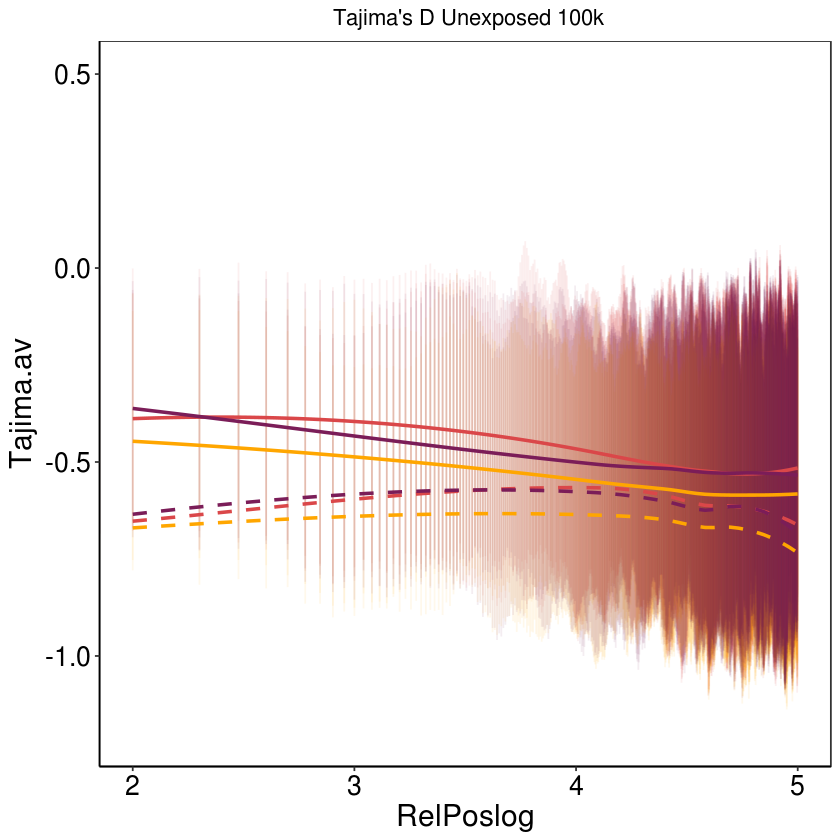

In [69]:
print(ggplot()+ theme_bw()
              + theme( panel.grid.minor = element_blank(), panel.grid.major = element_blank(), axis.line=element_line(color="black"), 
             axis.text=element_text(color="black", size=16), 
             axis.title=element_text(size=18),
            legend.text=element_text(size=14))  
      + ggtitle(" Tajima's D Unexposed 100k")+theme(plot.title = element_text(hjust = 0.5))
        + geom_linerange(data=NYU_av_50k, aes(x=RelPoslog, ymax = NYU_av_50k$Tajima.av+NYU_av_50k$Tajima.stdev, ymin = NYU_av_50k$Tajima.av-NYU_av_50k$Tajima.stdev), alpha = 0.08, col="#da4749")
    + geom_linerange(data=NJU_av_50k, aes(x=RelPoslog, ymax = NJU_av_50k$Tajima.av+NJU_av_50k$Tajima.stdev, ymin = NJU_av_50k$Tajima.av-NJU_av_50k$Tajima.stdev), alpha = 0.08, col="#ffa600")
          + geom_linerange(data=VTU_av_50k, aes(x=RelPoslog, ymax = VTU_av_50k$Tajima.av+NYU_av_50k$Tajima.stdev, ymin = VTU_av_50k$Tajima.av-VTU_av_50k$Tajima.stdev), alpha = 0.08, col="#7b1d58")
      + geom_smooth(data=NJU_av_50k, method="loess", col="#ffa600", se=FALSE, formula=y~x, aes(x=RelPoslog, y=Tajima.av))
    + geom_smooth(data=NYU_av_50k, method="loess", col="#da4749", se=FALSE, formula=y~x, aes(x=RelPoslog, y=Tajima.av))
    + geom_smooth(data=VTU_av_50k, method="loess", col="#7b1d58", se=FALSE, formula=y~x, aes(x=RelPoslog, y=Tajima.av))
      + geom_smooth(data=NJUN_av_50k, method="loess", col="#ffa600",  linetype="dashed", se=FALSE, formula=y~x, aes(x=RelPoslog, y=Tajima.av))
    + geom_smooth(data=NYUN_av_50k, method="loess", col="#da4749",  linetype="dashed", se=FALSE, formula=y~x, aes(x=RelPoslog, y=Tajima.av))
    + geom_smooth(data=VTUN_av_50k, method="loess", col="#7b1d58",  linetype="dashed", se=FALSE, formula=y~x, aes(x=RelPoslog, y=Tajima.av))
      + ylim(-1.2, .5))

In [70]:
ggsave("/local/home/sarahgw/WGS/SNPS/All_mylu/plots/TU100k_nr.pdf", h=5, w=8) 

Warning message:
“Removed 1 rows containing non-finite values (stat_smooth).”Warning message:
“Removed 1 rows containing non-finite values (stat_smooth).”Warning message:
“Removed 1 rows containing non-finite values (stat_smooth).”Warning message:
“Removed 1 rows containing non-finite values (stat_smooth).”Warning message:
“Removed 1 rows containing non-finite values (stat_smooth).”Warning message:
“Removed 1 rows containing non-finite values (stat_smooth).”

Warning message:
“Removed 1 rows containing non-finite values (stat_smooth).”Warning message:
“Removed 1 rows containing non-finite values (stat_smooth).”Warning message:
“Removed 1 rows containing non-finite values (stat_smooth).”Warning message:
“Removed 1 rows containing non-finite values (stat_smooth).”

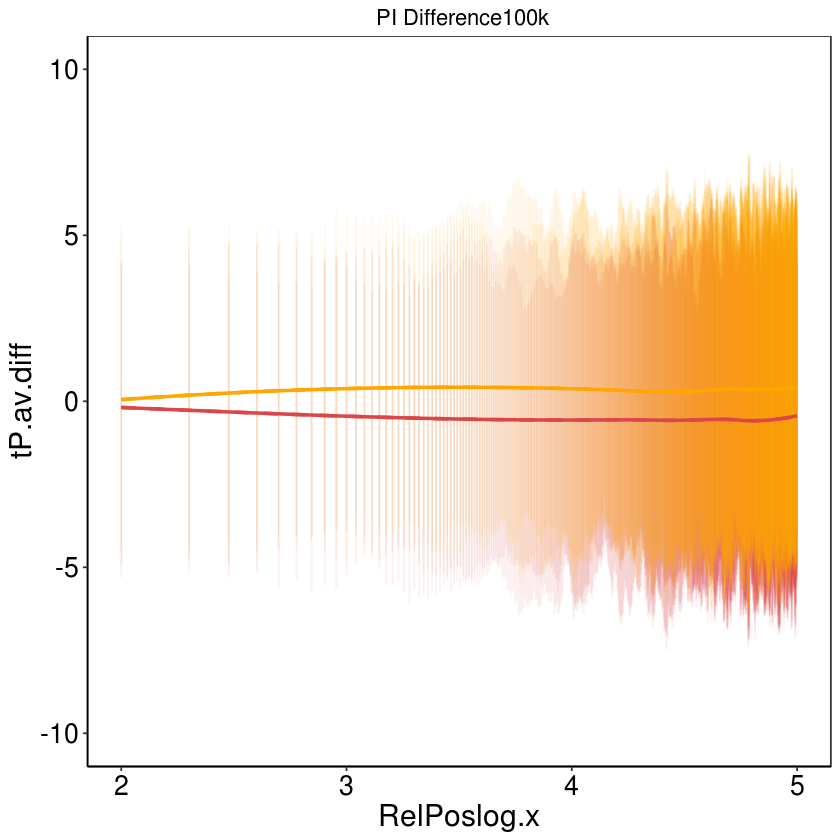

In [71]:
print(ggplot()+ theme_bw()
       + theme( panel.grid.minor = element_blank(), panel.grid.major = element_blank(), axis.line=element_line(color="black"), 
             axis.text=element_text(color="black", size=16), 
             axis.title=element_text(size=18),
            legend.text=element_text(size=14))    
     +ggtitle(" PI Difference100k")
      +theme(plot.title = element_text(hjust = 0.5))
        + geom_linerange(data=NY_av_50k, aes(x=RelPoslog.x, ymax = NY_av_50k$tP.av.diff+NY_av_50k$tP.stdev.x, ymin = NY_av_50k$tP.av.diff-NY_av_50k$tP.stdev.y), alpha = 0.08, col="#da4749")
        + geom_linerange(data=NJ_av_50k, aes(x=RelPoslog.x, ymax = NJ_av_50k$tP.av.diff+NJ_av_50k$tP.stdev.x, ymin = NJ_av_50k$tP.av.diff-NJ_av_50k$tP.stdev.y), alpha = 0.08, col="#ffa600")
        #+ geom_linerange(data=VT_av_50k, aes(x=RelPoslog.x, ymax = VT_av_50k$tP.av.diff+NY_av_50k$tP.stdev.x, ymin = VT_av_50k$tP.av.diff-VT_av_50k$tP.stdev.y), alpha = 0.08, col="#5f72b7")
        + geom_smooth(data=NJ_av_50k, method="loess", col="#ffa600", se=FALSE, formula=y~x, aes(x=RelPoslog.x, y=tP.av.diff))
        + geom_smooth(data=NY_av_50k, method="loess", col="#da4749", se=FALSE, formula=y~x, aes(x=RelPoslog.x, y=tP.av.diff))
       # + geom_smooth(data=VT_av_50k, method="loess", col="#5f72b7", se=FALSE, formula=y~x, aes(x=RelPoslog.x, y=tP.av.diff))  
        + geom_smooth(data=NJN_av_50k, method="loess", col="#ffa600",  linetype="dashed", se=FALSE, formula=y~x, aes(x=RelPoslog.x, y=tP.av.diff))
        + geom_smooth(data=NYN_av_50k, method="loess", col="#da4749",  linetype="dashed", se=FALSE, formula=y~x, aes(x=RelPoslog.x, y=tP.av.diff))
      #  + geom_smooth(data=VTN_av_50k, method="loess", col="#5f72b7",  linetype="dashed", se=FALSE, formula=y~x, aes(x=RelPoslog.x, y=tP.av.diff))
      + ylim(-10, 10)
     )


In [72]:
ggsave("/local/home/sarahgw/WGS/SNPS/All_mylu/plots/Pdiff100k_nr.pdf", h=5, w=8) 

Warning message:
“Removed 1 rows containing non-finite values (stat_smooth).”Warning message:
“Removed 1 rows containing non-finite values (stat_smooth).”Warning message:
“Removed 1 rows containing non-finite values (stat_smooth).”Warning message:
“Removed 1 rows containing non-finite values (stat_smooth).”

Warning message:
“Removed 1 rows containing non-finite values (stat_smooth).”Warning message:
“Removed 1 rows containing non-finite values (stat_smooth).”Warning message:
“Removed 1 rows containing non-finite values (stat_smooth).”Warning message:
“Removed 1 rows containing non-finite values (stat_smooth).”Warning message:
“Removed 1 rows containing non-finite values (stat_smooth).”Warning message:
“Removed 1 rows containing non-finite values (stat_smooth).”

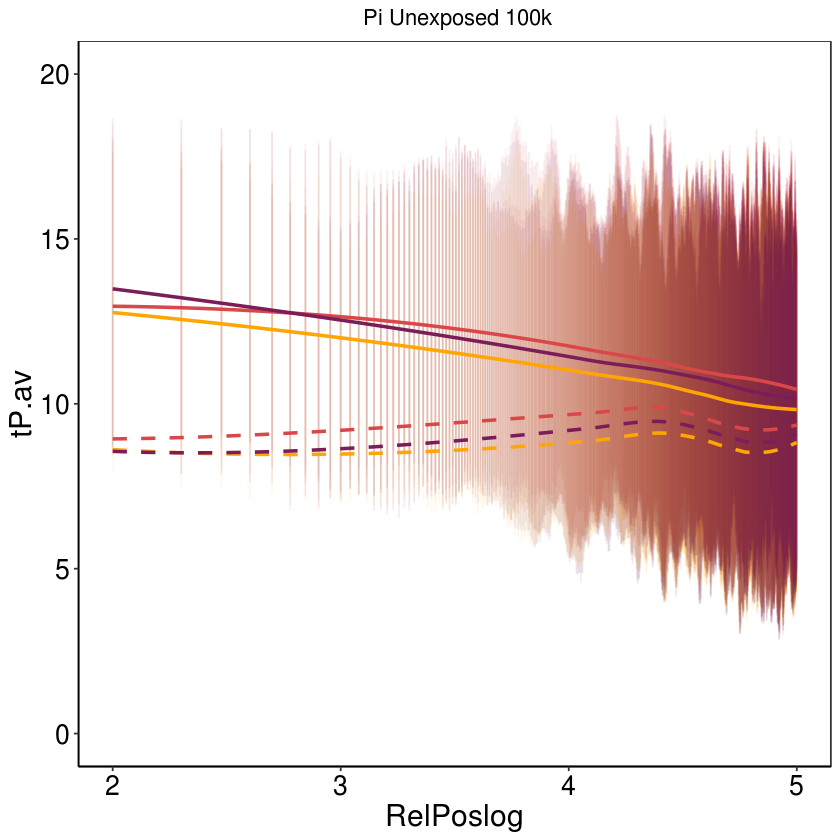

In [73]:
print(ggplot()+ theme_bw()
              + theme( panel.grid.minor = element_blank(), panel.grid.major = element_blank(), axis.line=element_line(color="black"), 
             axis.text=element_text(color="black", size=16), 
             axis.title=element_text(size=18),
            legend.text=element_text(size=14))  
      + ggtitle(" Pi Unexposed 100k")+theme(plot.title = element_text(hjust = 0.5))
    + geom_linerange(data=NYU_av_50k, aes(x=RelPoslog, ymax = NYU_av_50k$tP.av+NYU_av_50k$tP.stdev, ymin = NYU_av_50k$tP.av-NYU_av_50k$tP.stdev), alpha = 0.08, col="#da4749")
    + geom_linerange(data=NJU_av_50k, aes(x=RelPoslog, ymax = NJU_av_50k$tP.av+NJU_av_50k$tP.stdev, ymin = NJU_av_50k$tP.av-NJU_av_50k$tP.stdev), alpha = 0.08, col="#ffa600")
    + geom_linerange(data=VTU_av_50k, aes(x=RelPoslog, ymax = VTU_av_50k$tP.av+NYU_av_50k$tP.stdev, ymin = VTU_av_50k$tP.av-VTU_av_50k$tP.stdev), alpha = 0.08, col="#7b1d58")
    + geom_smooth(data=NJU_av_50k, method="loess", col="#ffa600", se=FALSE, formula=y~x, aes(x=RelPoslog, y=tP.av))
    + geom_smooth(data=NYU_av_50k, method="loess", col="#da4749", se=FALSE, formula=y~x, aes(x=RelPoslog, y=tP.av))
    + geom_smooth(data=VTU_av_50k, method="loess", col="#7b1d58", se=FALSE, formula=y~x, aes(x=RelPoslog, y=tP.av))
    + geom_smooth(data=NJUN_av_50k, method="loess", col="#ffa600", se=FALSE, linetype="dashed", formula=y~x, aes(x=RelPoslog, y=tP.av))
    + geom_smooth(data=NYUN_av_50k, method="loess", col="#da4749", se=FALSE, linetype="dashed", formula=y~x, aes(x=RelPoslog, y=tP.av))
    + geom_smooth(data=VTUN_av_50k, method="loess", col="#7b1d58", se=FALSE, linetype="dashed", formula=y~x, aes(x=RelPoslog, y=tP.av))
    +ylim(0,20))

In [74]:
ggsave("/local/home/sarahgw/WGS/SNPS/All_mylu/plots/PU100k_nr.pdf", h=5, w=8) 

Warning message:
“Removed 1 rows containing non-finite values (stat_smooth).”Warning message:
“Removed 1 rows containing non-finite values (stat_smooth).”Warning message:
“Removed 1 rows containing non-finite values (stat_smooth).”Warning message:
“Removed 1 rows containing non-finite values (stat_smooth).”Warning message:
“Removed 1 rows containing non-finite values (stat_smooth).”Warning message:
“Removed 1 rows containing non-finite values (stat_smooth).”

Warning message:
“Removed 1 rows containing non-finite values (stat_smooth).”Warning message:
“Removed 1 rows containing non-finite values (stat_smooth).”Warning message:
“Removed 1 rows containing non-finite values (stat_smooth).”Warning message:
“Removed 1 rows containing non-finite values (stat_smooth).”Warning message:
“Removed 1 rows containing non-finite values (stat_smooth).”Warning message:
“Removed 1 rows containing non-finite values (stat_smooth).”

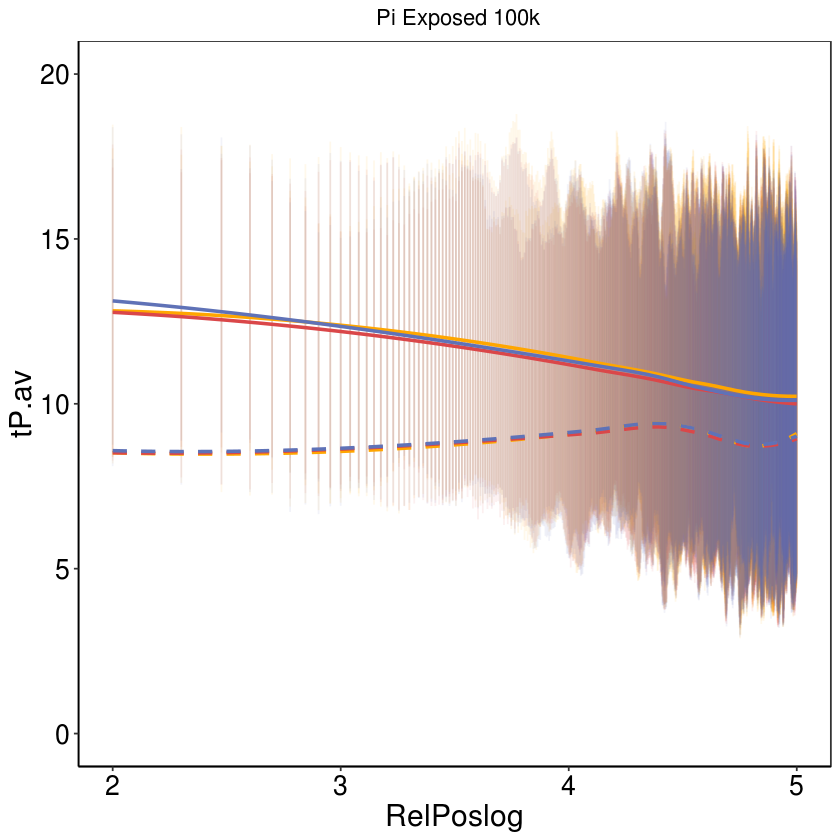

In [75]:
print(ggplot()+ theme_bw()
            + theme( panel.grid.minor = element_blank(), panel.grid.major = element_blank(), axis.line=element_line(color="black"), 
             axis.text=element_text(color="black", size=16), 
             axis.title=element_text(size=18),
            legend.text=element_text(size=14))  
      + ggtitle(" Pi Exposed 100k")+theme(plot.title = element_text(hjust = 0.5))
    + geom_linerange(data=NYE_av_50k, aes(x=RelPoslog, ymax = NYE_av_50k$tP.av+NYE_av_50k$tP.stdev, ymin = NYE_av_50k$tP.av-NYE_av_50k$tP.stdev), alpha = 0.08, col="#da4749")
    + geom_linerange(data=NJE_av_50k, aes(x=RelPoslog, ymax = NJE_av_50k$tP.av+NJE_av_50k$tP.stdev, ymin = NJE_av_50k$tP.av-NJE_av_50k$tP.stdev), alpha = 0.08, col="#ffa600")
    + geom_linerange(data=VTE_av_50k, aes(x=RelPoslog, ymax = VTE_av_50k$tP.av+NYE_av_50k$tP.stdev, ymin = VTE_av_50k$tP.av-VTE_av_50k$tP.stdev), alpha = 0.08, col="#5f72b7")
    + geom_smooth(data=NJE_av_50k, method="loess", col="#ffa600", se=FALSE, formula=y~x, aes(x=RelPoslog, y=tP.av))
    + geom_smooth(data=NYE_av_50k, method="loess", col="#da4749", se=FALSE, formula=y~x, aes(x=RelPoslog, y=tP.av))
    + geom_smooth(data=VTE_av_50k, method="loess", col="#5f72b7", se=FALSE, formula=y~x, aes(x=RelPoslog, y=tP.av))
    + geom_smooth(data=NJEN_av_50k, method="loess", col="#ffa600", se=FALSE, linetype="dashed", formula=y~x, aes(x=RelPoslog, y=tP.av))
    + geom_smooth(data=NYEN_av_50k, method="loess", col="#da4749", se=FALSE, linetype="dashed", formula=y~x, aes(x=RelPoslog, y=tP.av))
    + geom_smooth(data=VTEN_av_50k, method="loess", col="#5f72b7", se=FALSE, linetype="dashed", formula=y~x, aes(x=RelPoslog, y=tP.av))
    + ylim(0, 20))

In [76]:
ggsave("/local/home/sarahgw/WGS/SNPS/All_mylu/plots/PE1005k_nr.pdf", h=5, w=8) 

Warning message:
“Removed 1 rows containing non-finite values (stat_smooth).”Warning message:
“Removed 1 rows containing non-finite values (stat_smooth).”Warning message:
“Removed 1 rows containing non-finite values (stat_smooth).”Warning message:
“Removed 1 rows containing non-finite values (stat_smooth).”Warning message:
“Removed 1 rows containing non-finite values (stat_smooth).”Warning message:
“Removed 1 rows containing non-finite values (stat_smooth).”

# One million basepairs

In [77]:
NJE_av_50k=NJE_av[abs(NJE_av$RelPosRound)<1000000,]
NJU_av_50k=NJU_av[abs(NJU_av$RelPosRound)<1000000,]
NYE_av_50k=NYE_av[abs(NYE_av$RelPosRound)<1000000,]
NYU_av_50k=NYU_av[abs(NYU_av$RelPosRound)<1000000,]
VTE_av_50k=VTE_av[abs(VTE_av$RelPosRound)<1000000,]
VTU_av_50k=VTU_av[abs(VTU_av$RelPosRound)<1000000,]

NJEN_av_50k=NJEN_av[abs(NJEN_av$RelPosRound)<1000000,]
NJUN_av_50k=NJUN_av[abs(NJUN_av$RelPosRound)<1000000,]
NYEN_av_50k=NYEN_av[abs(NYEN_av$RelPosRound)<1000000,]
NYUN_av_50k=NYUN_av[abs(NYUN_av$RelPosRound)<1000000,]
VTEN_av_50k=VTEN_av[abs(VTEN_av$RelPosRound)<1000000,]
VTUN_av_50k=VTUN_av[abs(VTUN_av$RelPosRound)<1000000,]

In [78]:
NJ_av_50k=NJ_av[abs(NJ_av$RelPosRound)<1000000,]
NY_av_50k=NY_av[abs(NY_av$RelPosRound)<1000000,]
VT_av_50k=VT_av[abs(VT_av$RelPosRound)<1000000,]

NJN_av_50k=NJ_av[abs(NJN_av$RelPosRound)<1000000,]
NYN_av_50k=NY_av[abs(NYN_av$RelPosRound)<1000000,]
VTN_av_50k=VT_av[abs(VTN_av$RelPosRound)<1000000,]

Warning message:
“Removed 1 rows containing non-finite values (stat_smooth).”Warning message:
“Removed 1 rows containing non-finite values (stat_smooth).”Warning message:
“Removed 1 rows containing non-finite values (stat_smooth).”Warning message:
“Removed 1 rows containing non-finite values (stat_smooth).”

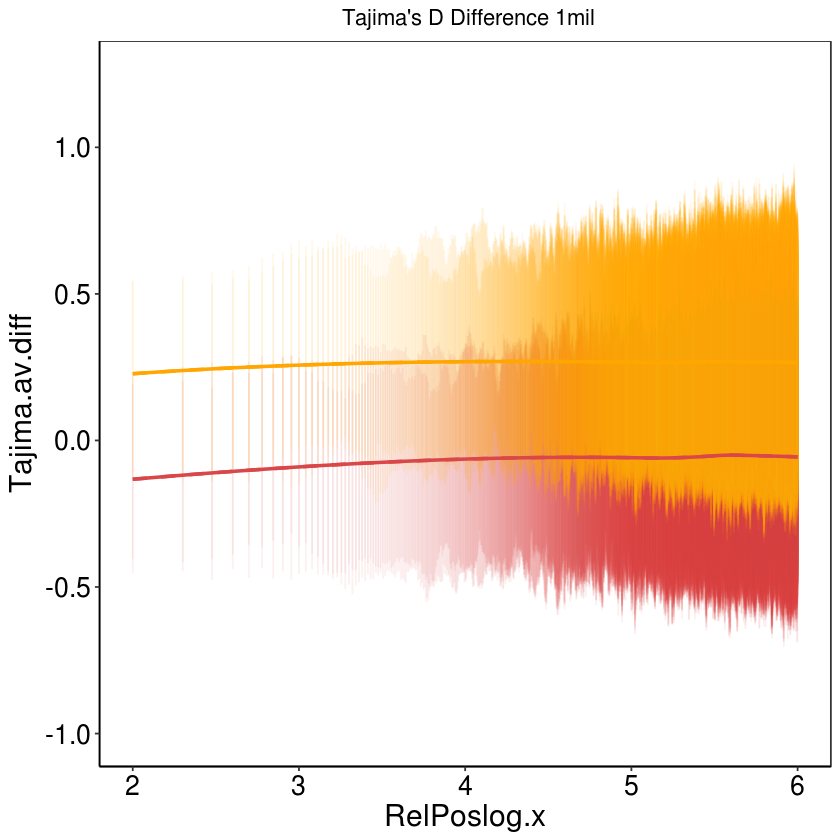

In [80]:
print(ggplot()+ theme_bw()
       + theme( panel.grid.minor = element_blank(), panel.grid.major = element_blank(), axis.line=element_line(color="black"), 
             axis.text=element_text(color="black", size=16), 
             axis.title=element_text(size=18),
            legend.text=element_text(size=14))    
     +ggtitle(" Tajima's D Difference 1mil")
      +theme(plot.title = element_text(hjust = 0.5))
        + geom_linerange(data=NY_av_50k, aes(x=RelPoslog.x, ymax = NY_av_50k$Tajima.av.diff+NY_av_50k$Tajima.stdev.x, ymin = NY_av_50k$Tajima.av.diff-NY_av_50k$Tajima.stdev.y), alpha = 0.08, col="#da4749")
        + geom_linerange(data=NJ_av_50k, aes(x=RelPoslog.x, ymax = NJ_av_50k$Tajima.av.diff+NJ_av_50k$Tajima.stdev.x, ymin = NJ_av_50k$Tajima.av.diff-NJ_av_50k$Tajima.stdev.y), alpha = 0.08, col="#ffa600")
      #  + geom_linerange(data=VT_av_50k, aes(x=RelPoslog.x, ymax = VT_av_50k$Tajima.av.diff+NY_av_50k$Tajima.stdev.x, ymin = VT_av_50k$Tajima.av.diff-VT_av_50k$Tajima.stdev.y), alpha = 0.08, col="#5f72b7")
        + geom_smooth(data=NJ_av_50k, method="loess", col="#ffa600", se=FALSE, formula=y~x, aes(x=RelPoslog.x, y=Tajima.av.diff))
        + geom_smooth(data=NY_av_50k, method="loess", col="#da4749", se=FALSE, formula=y~x, aes(x=RelPoslog.x, y=Tajima.av.diff))
       # + geom_smooth(data=VT_av_50k, method="loess", col="#5f72b7", se=FALSE, formula=y~x, aes(x=RelPoslog.x, y=Tajima.av.diff))  
        + geom_smooth(data=NJN_av_50k, method="loess", col="#ffa600",  linetype="dashed", se=FALSE, formula=y~x, aes(x=RelPoslog.x, y=Tajima.av.diff))
        + geom_smooth(data=NYN_av_50k, method="loess", col="#da4749",  linetype="dashed", se=FALSE, formula=y~x, aes(x=RelPoslog.x, y=Tajima.av.diff))
        #+ geom_smooth(data=VTN_av_50k, method="loess", col="#5f72b7",  linetype="dashed", se=FALSE, formula=y~x, aes(x=RelPoslog.x, y=Tajima.av.diff))
      + ylim(-1, 1.25)
     )

In [81]:
ggsave("/local/home/sarahgw/WGS/SNPS/All_mylu/plots/Tdiff1m_nr.pdf", h=5, w=8) 

Warning message:
“Removed 1 rows containing non-finite values (stat_smooth).”Warning message:
“Removed 1 rows containing non-finite values (stat_smooth).”Warning message:
“Removed 1 rows containing non-finite values (stat_smooth).”Warning message:
“Removed 1 rows containing non-finite values (stat_smooth).”

Warning message:
“Removed 1 rows containing non-finite values (stat_smooth).”Warning message:
“Removed 1 rows containing non-finite values (stat_smooth).”Warning message:
“Removed 1 rows containing non-finite values (stat_smooth).”Warning message:
“Removed 1 rows containing non-finite values (stat_smooth).”Warning message:
“Removed 1 rows containing non-finite values (stat_smooth).”Warning message:
“Removed 1 rows containing non-finite values (stat_smooth).”Warning message:
“Removed 220 rows containing missing values (geom_linerange).”Warning message:
“Removed 2347 rows containing missing values (geom_linerange).”

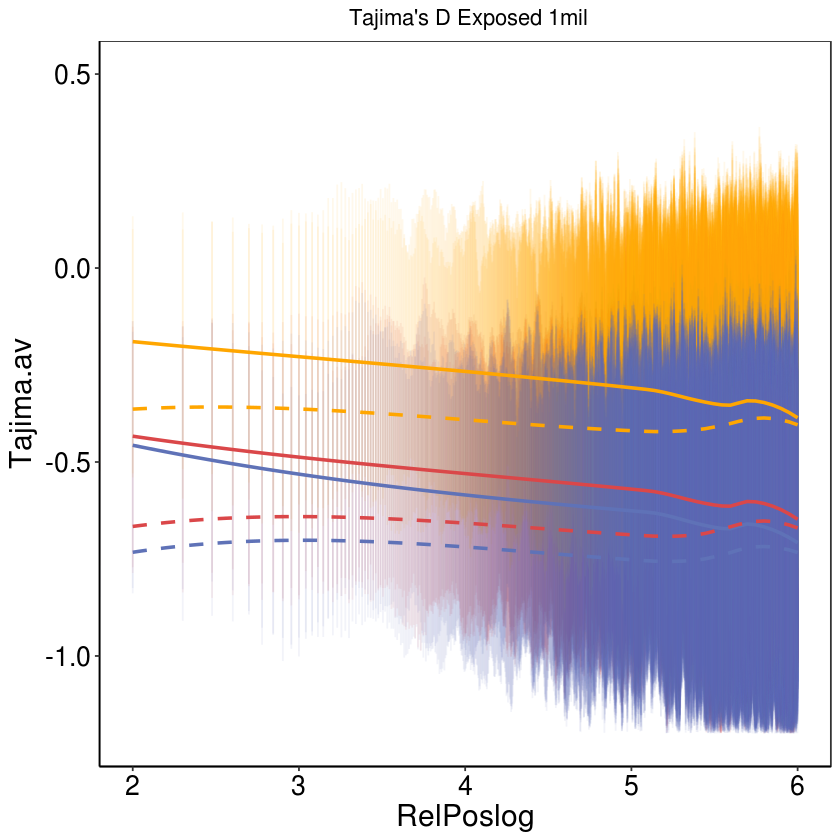

In [82]:
print(ggplot()+ theme_bw()
           + theme( panel.grid.minor = element_blank(), panel.grid.major = element_blank(), axis.line=element_line(color="black"), 
             axis.text=element_text(color="black", size=16), 
             axis.title=element_text(size=18),
            legend.text=element_text(size=14))  
      + ggtitle(" Tajima's D Exposed 1mil")+theme(plot.title = element_text(hjust = 0.5))
    + geom_linerange(data=NYE_av_50k, aes(x=RelPoslog, ymax = NYE_av_50k$Tajima.av+NYE_av_50k$Tajima.stdev, ymin = NYE_av_50k$Tajima.av-NYE_av_50k$Tajima.stdev), alpha = 0.08, col="#da4749")
    + geom_linerange(data=NJE_av_50k, aes(x=RelPoslog, ymax = NJE_av_50k$Tajima.av+NJE_av_50k$Tajima.stdev, ymin = NJE_av_50k$Tajima.av-NJE_av_50k$Tajima.stdev), alpha = 0.08, col="#ffa600")
    + geom_linerange(data=VTE_av_50k, aes(x=RelPoslog, ymax = VTE_av_50k$Tajima.av+NYE_av_50k$Tajima.stdev, ymin = VTE_av_50k$Tajima.av-VTE_av_50k$Tajima.stdev), alpha = 0.08, col="#5f72b7")
    + geom_smooth(data=NJE_av_50k, method="loess", col="#ffa600", se=FALSE, formula=y~x, aes(x=RelPoslog, y=Tajima.av))
    + geom_smooth(data=NYE_av_50k, method="loess", col="#da4749", se=FALSE, formula=y~x, aes(x=RelPoslog, y=Tajima.av))
    + geom_smooth(data=VTE_av_50k, method="loess", col="#5f72b7", se=FALSE, formula=y~x, aes(x=RelPoslog, y=Tajima.av))
    + geom_smooth(data=NJEN_av_50k, method="loess", col="#ffa600",  linetype="dashed", se=FALSE, formula=y~x, aes(x=RelPoslog, y=Tajima.av))
    + geom_smooth(data=NYEN_av_50k, method="loess", col="#da4749",  linetype="dashed", se=FALSE, formula=y~x, aes(x=RelPoslog, y=Tajima.av))
    + geom_smooth(data=VTEN_av_50k, method="loess", col="#5f72b7",  linetype="dashed", se=FALSE, formula=y~x, aes(x=RelPoslog, y=Tajima.av))

      + ylim(-1.2, .5))

In [83]:
ggsave("/local/home/sarahgw/WGS/SNPS/All_mylu/plots/TE1m_nr.pdf", h=5, w=8) 

Warning message:
“Removed 1 rows containing non-finite values (stat_smooth).”Warning message:
“Removed 1 rows containing non-finite values (stat_smooth).”Warning message:
“Removed 1 rows containing non-finite values (stat_smooth).”Warning message:
“Removed 1 rows containing non-finite values (stat_smooth).”Warning message:
“Removed 1 rows containing non-finite values (stat_smooth).”Warning message:
“Removed 1 rows containing non-finite values (stat_smooth).”Warning message:
“Removed 220 rows containing missing values (geom_linerange).”Warning message:
“Removed 2347 rows containing missing values (geom_linerange).”

Warning message:
“Removed 1 rows containing non-finite values (stat_smooth).”Warning message:
“Removed 1 rows containing non-finite values (stat_smooth).”Warning message:
“Removed 1 rows containing non-finite values (stat_smooth).”Warning message:
“Removed 1 rows containing non-finite values (stat_smooth).”Warning message:
“Removed 1 rows containing non-finite values (stat_smooth).”Warning message:
“Removed 1 rows containing non-finite values (stat_smooth).”Warning message:
“Removed 51 rows containing missing values (geom_linerange).”Warning message:
“Removed 262 rows containing missing values (geom_linerange).”Warning message:
“Removed 174 rows containing missing values (geom_linerange).”

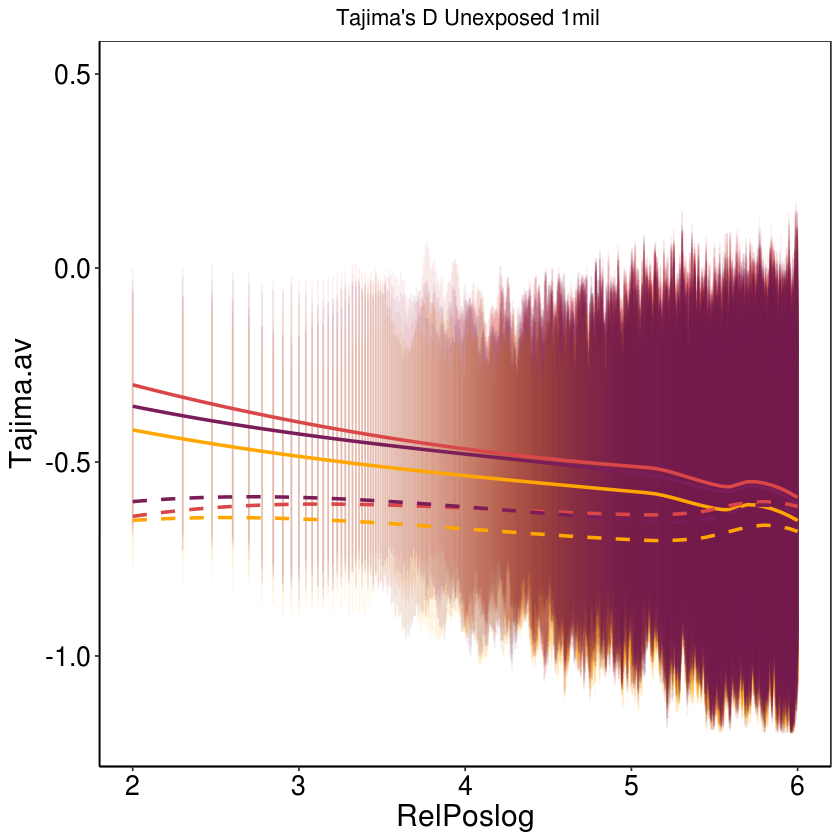

In [84]:
print(ggplot()+ theme_bw()
           + theme( panel.grid.minor = element_blank(), panel.grid.major = element_blank(), axis.line=element_line(color="black"), 
             axis.text=element_text(color="black", size=16), 
             axis.title=element_text(size=18),
            legend.text=element_text(size=14))  
      + ggtitle(" Tajima's D Unexposed 1mil")+theme(plot.title = element_text(hjust = 0.5))
        + geom_linerange(data=NYU_av_50k, aes(x=RelPoslog, ymax = NYU_av_50k$Tajima.av+NYU_av_50k$Tajima.stdev, ymin = NYU_av_50k$Tajima.av-NYU_av_50k$Tajima.stdev), alpha = 0.08, col="#da4749")
    + geom_linerange(data=NJU_av_50k, aes(x=RelPoslog, ymax = NJU_av_50k$Tajima.av+NJU_av_50k$Tajima.stdev, ymin = NJU_av_50k$Tajima.av-NJU_av_50k$Tajima.stdev), alpha = 0.08, col="#ffa600")
          + geom_linerange(data=VTU_av_50k, aes(x=RelPoslog, ymax = VTU_av_50k$Tajima.av+NYU_av_50k$Tajima.stdev, ymin = VTU_av_50k$Tajima.av-VTU_av_50k$Tajima.stdev), alpha = 0.08, col="#7b1d58")
      + geom_smooth(data=NJU_av_50k, method="loess", col="#ffa600", se=FALSE, formula=y~x, aes(x=RelPoslog, y=Tajima.av))
    + geom_smooth(data=NYU_av_50k, method="loess", col="#da4749", se=FALSE, formula=y~x, aes(x=RelPoslog, y=Tajima.av))
    + geom_smooth(data=VTU_av_50k, method="loess", col="#7b1d58", se=FALSE, formula=y~x, aes(x=RelPoslog, y=Tajima.av))
    + geom_smooth(data=NJUN_av_50k, method="loess", col="#ffa600",  linetype="dashed", se=FALSE, formula=y~x, aes(x=RelPoslog, y=Tajima.av))
    + geom_smooth(data=NYUN_av_50k, method="loess", col="#da4749",  linetype="dashed", se=FALSE, formula=y~x, aes(x=RelPoslog, y=Tajima.av))
    + geom_smooth(data=VTUN_av_50k, method="loess", col="#7b1d58",  linetype="dashed", se=FALSE, formula=y~x, aes(x=RelPoslog, y=Tajima.av))
      + ylim(-1.2, .5))

In [85]:
ggsave("/local/home/sarahgw/WGS/SNPS/All_mylu/plots/TU1m_nr.pdf", h=5, w=8) 

Warning message:
“Removed 1 rows containing non-finite values (stat_smooth).”Warning message:
“Removed 1 rows containing non-finite values (stat_smooth).”Warning message:
“Removed 1 rows containing non-finite values (stat_smooth).”Warning message:
“Removed 1 rows containing non-finite values (stat_smooth).”Warning message:
“Removed 1 rows containing non-finite values (stat_smooth).”Warning message:
“Removed 1 rows containing non-finite values (stat_smooth).”Warning message:
“Removed 51 rows containing missing values (geom_linerange).”Warning message:
“Removed 262 rows containing missing values (geom_linerange).”Warning message:
“Removed 174 rows containing missing values (geom_linerange).”

Warning message:
“Removed 1 rows containing non-finite values (stat_smooth).”Warning message:
“Removed 1 rows containing non-finite values (stat_smooth).”Warning message:
“Removed 1 rows containing non-finite values (stat_smooth).”Warning message:
“Removed 1 rows containing non-finite values (stat_smooth).”

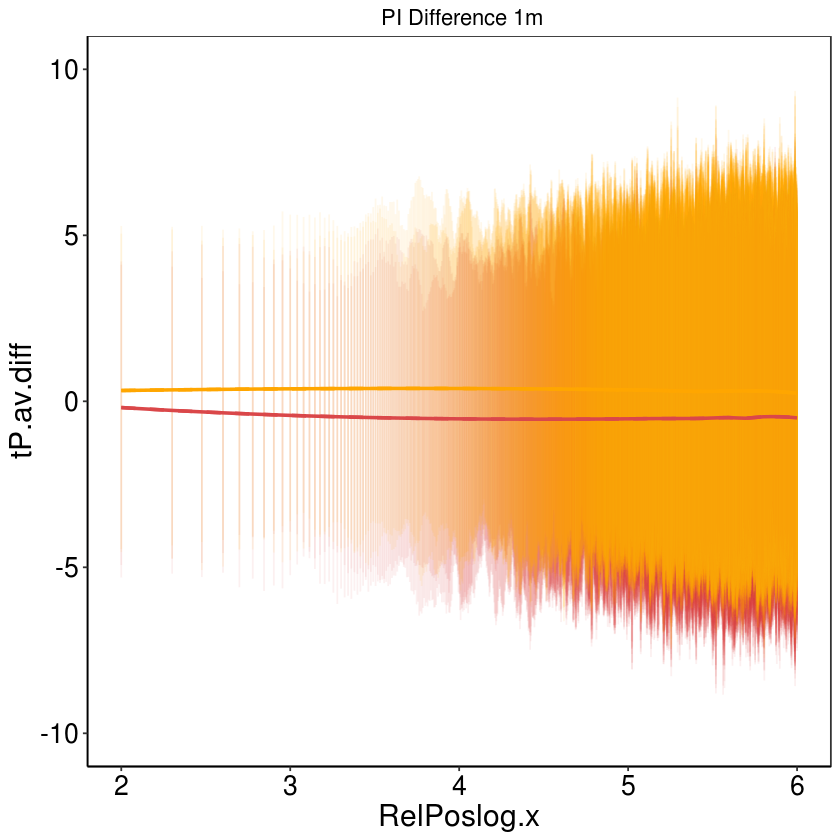

In [86]:
print(ggplot()+ theme_bw()
       + theme( panel.grid.minor = element_blank(), panel.grid.major = element_blank(), axis.line=element_line(color="black"), 
             axis.text=element_text(color="black", size=16), 
             axis.title=element_text(size=18),
            legend.text=element_text(size=14))    
     +ggtitle(" PI Difference 1m")
      +theme(plot.title = element_text(hjust = 0.5))
        + geom_linerange(data=NY_av_50k, aes(x=RelPoslog.x, ymax = NY_av_50k$tP.av.diff+NY_av_50k$tP.stdev.x, ymin = NY_av_50k$tP.av.diff-NY_av_50k$tP.stdev.y), alpha = 0.08, col="#da4749")
        + geom_linerange(data=NJ_av_50k, aes(x=RelPoslog.x, ymax = NJ_av_50k$tP.av.diff+NJ_av_50k$tP.stdev.x, ymin = NJ_av_50k$tP.av.diff-NJ_av_50k$tP.stdev.y), alpha = 0.08, col="#ffa600")
        #+ geom_linerange(data=VT_av_50k, aes(x=RelPoslog.x, ymax = VT_av_50k$tP.av.diff+NY_av_50k$tP.stdev.x, ymin = VT_av_50k$tP.av.diff-VT_av_50k$tP.stdev.y), alpha = 0.08, col="#5f72b7")
        + geom_smooth(data=NJ_av_50k, method="loess", col="#ffa600", se=FALSE, formula=y~x, aes(x=RelPoslog.x, y=tP.av.diff))
        + geom_smooth(data=NY_av_50k, method="loess", col="#da4749", se=FALSE, formula=y~x, aes(x=RelPoslog.x, y=tP.av.diff))
        #+ geom_smooth(data=VT_av_50k, method="loess", col="#5f72b7", se=FALSE, formula=y~x, aes(x=RelPoslog.x, y=tP.av.diff))  
        + geom_smooth(data=NJN_av_50k, method="loess", col="#ffa600",  linetype="dashed", se=FALSE, formula=y~x, aes(x=RelPoslog.x, y=tP.av.diff))
        + geom_smooth(data=NYN_av_50k, method="loess", col="#da4749",  linetype="dashed", se=FALSE, formula=y~x, aes(x=RelPoslog.x, y=tP.av.diff))
       # + geom_smooth(data=VTN_av_50k, method="loess", col="#5f72b7",  linetype="dashed", se=FALSE, formula=y~x, aes(x=RelPoslog.x, y=tP.av.diff))
      + ylim(-10, 10)
     )

In [87]:
ggsave("/local/home/sarahgw/WGS/SNPS/All_mylu/plots/Pdif1m_nr.pdf", h=5, w=8) 

Warning message:
“Removed 1 rows containing non-finite values (stat_smooth).”Warning message:
“Removed 1 rows containing non-finite values (stat_smooth).”Warning message:
“Removed 1 rows containing non-finite values (stat_smooth).”Warning message:
“Removed 1 rows containing non-finite values (stat_smooth).”

Warning message:
“Removed 1 rows containing non-finite values (stat_smooth).”Warning message:
“Removed 1 rows containing non-finite values (stat_smooth).”Warning message:
“Removed 1 rows containing non-finite values (stat_smooth).”Warning message:
“Removed 1 rows containing non-finite values (stat_smooth).”Warning message:
“Removed 1 rows containing non-finite values (stat_smooth).”Warning message:
“Removed 1 rows containing non-finite values (stat_smooth).”

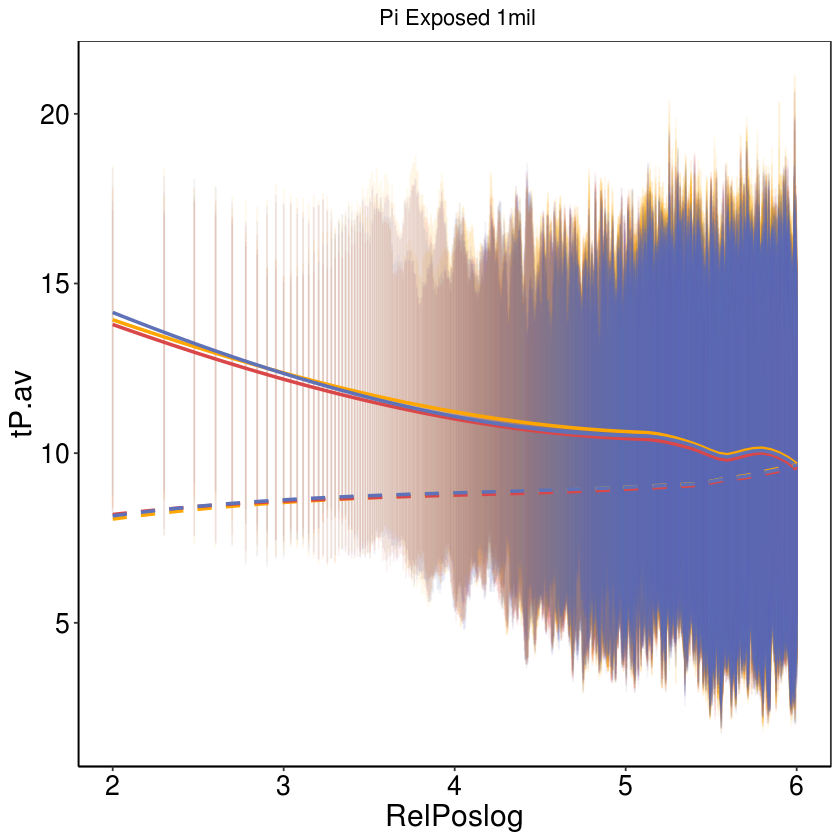

In [88]:
print(ggplot()+ theme_bw()
           + theme( panel.grid.minor = element_blank(), panel.grid.major = element_blank(), axis.line=element_line(color="black"), 
             axis.text=element_text(color="black", size=16), 
             axis.title=element_text(size=18),
            legend.text=element_text(size=14))  
      + ggtitle(" Pi Exposed 1mil")+theme(plot.title = element_text(hjust = 0.5))
    + geom_linerange(data=NYE_av_50k, aes(x=RelPoslog, ymax = NYE_av_50k$tP.av+NYE_av_50k$tP.stdev, ymin = NYE_av_50k$tP.av-NYE_av_50k$tP.stdev), alpha = 0.08, col="#da4749")
    + geom_linerange(data=NJE_av_50k, aes(x=RelPoslog, ymax = NJE_av_50k$tP.av+NJE_av_50k$tP.stdev, ymin = NJE_av_50k$tP.av-NJE_av_50k$tP.stdev), alpha = 0.08, col="#ffa600")
    + geom_linerange(data=VTE_av_50k, aes(x=RelPoslog, ymax = VTE_av_50k$tP.av+NYE_av_50k$tP.stdev, ymin = VTE_av_50k$tP.av-VTE_av_50k$tP.stdev), alpha = 0.08, col="#5f72b7")
    + geom_smooth(data=NJE_av_50k, method="loess", col="#ffa600", se=FALSE, formula=y~x, aes(x=RelPoslog, y=tP.av))
    + geom_smooth(data=NYE_av_50k, method="loess", col="#da4749", se=FALSE, formula=y~x, aes(x=RelPoslog, y=tP.av))
    + geom_smooth(data=VTE_av_50k, method="loess", col="#5f72b7", se=FALSE, formula=y~x, aes(x=RelPoslog, y=tP.av))
    + geom_smooth(data=NJEN_av_50k, method="loess", col="#ffa600", se=FALSE, linetype="dashed", formula=y~x, aes(x=RelPoslog, y=tP.av))
    + geom_smooth(data=NYEN_av_50k, method="loess", col="#da4749", se=FALSE, linetype="dashed", formula=y~x, aes(x=RelPoslog, y=tP.av))
    + geom_smooth(data=VTEN_av_50k, method="loess", col="#5f72b7", se=FALSE, linetype="dashed", formula=y~x, aes(x=RelPoslog, y=tP.av))
    )

In [89]:
ggsave("/local/home/sarahgw/WGS/SNPS/All_mylu/plots/PE1m_nr.pdf", h=5, w=8) 

Warning message:
“Removed 1 rows containing non-finite values (stat_smooth).”Warning message:
“Removed 1 rows containing non-finite values (stat_smooth).”Warning message:
“Removed 1 rows containing non-finite values (stat_smooth).”Warning message:
“Removed 1 rows containing non-finite values (stat_smooth).”Warning message:
“Removed 1 rows containing non-finite values (stat_smooth).”Warning message:
“Removed 1 rows containing non-finite values (stat_smooth).”

Warning message:
“Removed 1 rows containing non-finite values (stat_smooth).”Warning message:
“Removed 1 rows containing non-finite values (stat_smooth).”Warning message:
“Removed 1 rows containing non-finite values (stat_smooth).”Warning message:
“Removed 1 rows containing non-finite values (stat_smooth).”Warning message:
“Removed 1 rows containing non-finite values (stat_smooth).”Warning message:
“Removed 1 rows containing non-finite values (stat_smooth).”

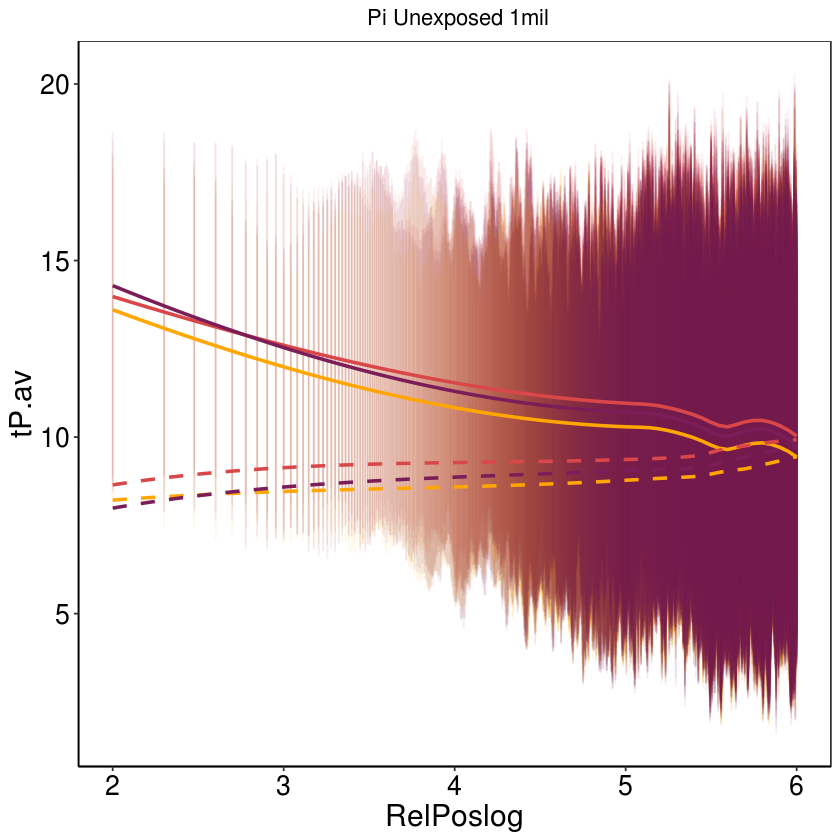

In [90]:
print(ggplot()+ theme_bw()
           + theme( panel.grid.minor = element_blank(), panel.grid.major = element_blank(), axis.line=element_line(color="black"), 
             axis.text=element_text(color="black", size=16), 
             axis.title=element_text(size=18),
            legend.text=element_text(size=14))  
      + ggtitle(" Pi Unexposed 1mil")+theme(plot.title = element_text(hjust = 0.5))
    + geom_linerange(data=NYU_av_50k, aes(x=RelPoslog, ymax = NYU_av_50k$tP.av+NYU_av_50k$tP.stdev, ymin = NYU_av_50k$tP.av-NYU_av_50k$tP.stdev), alpha = 0.08, col="#da4749")
    + geom_linerange(data=NJU_av_50k, aes(x=RelPoslog, ymax = NJU_av_50k$tP.av+NJU_av_50k$tP.stdev, ymin = NJU_av_50k$tP.av-NJU_av_50k$tP.stdev), alpha = 0.08, col="#ffa600")
    + geom_linerange(data=VTU_av_50k, aes(x=RelPoslog, ymax = VTU_av_50k$tP.av+NYU_av_50k$tP.stdev, ymin = VTU_av_50k$tP.av-VTU_av_50k$tP.stdev), alpha = 0.08, col="#7b1d58")
    + geom_smooth(data=NJU_av_50k, method="loess", col="#ffa600", se=FALSE, formula=y~x, aes(x=RelPoslog, y=tP.av))
    + geom_smooth(data=NYU_av_50k, method="loess", col="#da4749", se=FALSE, formula=y~x, aes(x=RelPoslog, y=tP.av))
    + geom_smooth(data=VTU_av_50k, method="loess", col="#7b1d58", se=FALSE, formula=y~x, aes(x=RelPoslog, y=tP.av))
    + geom_smooth(data=NJUN_av_50k, method="loess", col="#ffa600", se=FALSE, linetype="dashed", formula=y~x, aes(x=RelPoslog, y=tP.av))
    + geom_smooth(data=NYUN_av_50k, method="loess", col="#da4749", se=FALSE, linetype="dashed", formula=y~x, aes(x=RelPoslog, y=tP.av))
    + geom_smooth(data=VTUN_av_50k, method="loess", col="#7b1d58", se=FALSE, linetype="dashed", formula=y~x, aes(x=RelPoslog, y=tP.av))
    )

In [91]:
ggsave("/local/home/sarahgw/WGS/SNPS/All_mylu/plots/PU1m_nr.pdf", h=5, w=8) 

Warning message:
“Removed 1 rows containing non-finite values (stat_smooth).”Warning message:
“Removed 1 rows containing non-finite values (stat_smooth).”Warning message:
“Removed 1 rows containing non-finite values (stat_smooth).”Warning message:
“Removed 1 rows containing non-finite values (stat_smooth).”Warning message:
“Removed 1 rows containing non-finite values (stat_smooth).”Warning message:
“Removed 1 rows containing non-finite values (stat_smooth).”

In [93]:
require("ggplot2")

In [94]:
NJEz$Time="Post"
NJUz$Time="Pre"


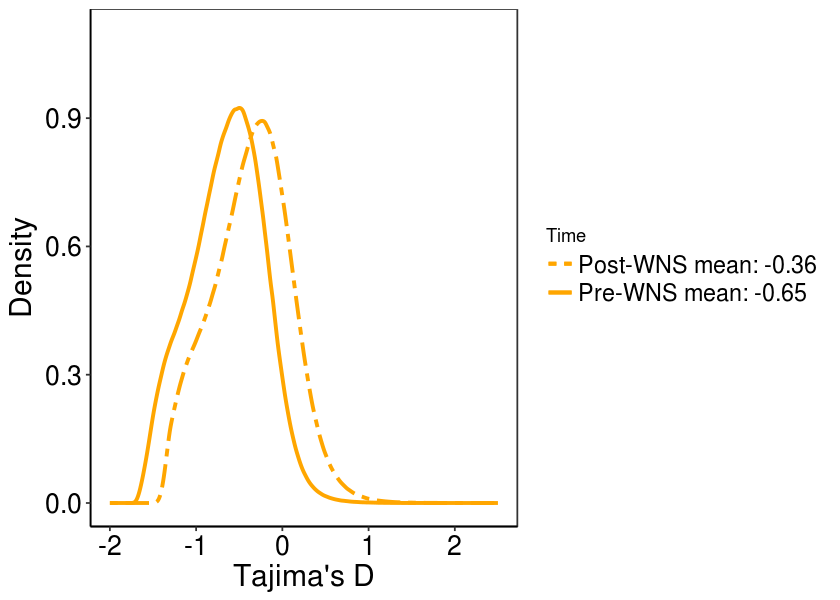

In [95]:
options(repr.plot.width=7, repr.plot.height=5)
print(ggplot() + theme_bw()
          + geom_line(stat="density", data=NJEz, aes(NJEz$Tajima, linetype=Time), color= "#ffa600", size=1.1)
          + geom_line(stat="density", data=NJUz, aes(NJUz$Tajima, linetype=Time), color= "#ffa600" , size=1.1)
        + xlim (-2,2.5)
      + ylim(0,1.1)
     + theme( panel.grid.minor = element_blank(), panel.grid.major = element_blank(), axis.line=element_line(color="black"), 
             axis.text=element_text(color="black", size=16), 
             axis.title=element_text(size=18),
            legend.text=element_text(size=14))                                                                                                                           
      + xlab("Tajima's D")
        + ylab("Density")
      + scale_linetype_manual(values=c('twodash', 'solid'), labels=c( 'Post-WNS mean: -0.36', 'Pre-WNS mean: -0.65'), guide='legend')
     ) 


In [21]:
ggsave("/local/home/sarahgw/WGS/SNPS/All_mylu/plots/Hibernia_D.pdf", h=5, w=8) 

In [8]:
NYEz$Time="Post"
NYUz$Time="Pre"

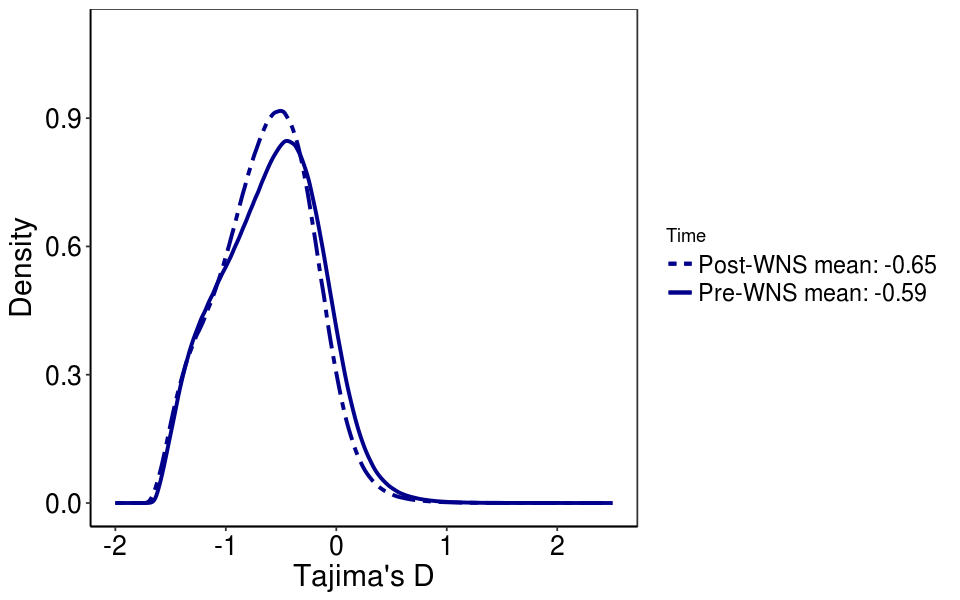

In [22]:
options(repr.plot.width=8, repr.plot.height=5)
print(ggplot() + theme_bw()
       + geom_line(stat="density", data=NYEz, aes(NYEz$Tajima, linetype=Time), color="#da4749", size=1.1)
            + geom_line(stat="density", data=NYUz, aes(NYUz$Tajima, linetype=Time) , color= "darkblue", size=1.1)
        + xlim (-2,2.5)
      + ylim(0,1.1)
     + theme( panel.grid.minor = element_blank(), panel.grid.major = element_blank(), 
             axis.line=element_line(color="black"), axis.text=element_text(color="black", size=16), 
             axis.title=element_text(size=18),
            legend.text=element_text(size=14))
      +xlab("Tajima's D")
        + ylab("Density")
        + scale_linetype_manual(values=c('twodash', 'solid'), labels=c( 'Post-WNS mean: -0.65', 'Pre-WNS mean: -0.59'), guide='legend')
     ) 


In [24]:
ggsave("/local/home/sarahgw/WGS/SNPS/All_mylu/plots/Williams_D.pdf", h=5, w=8) 

In [ ]:
 + geom_density(data=NJEz, aes(NJEz$Tajima))

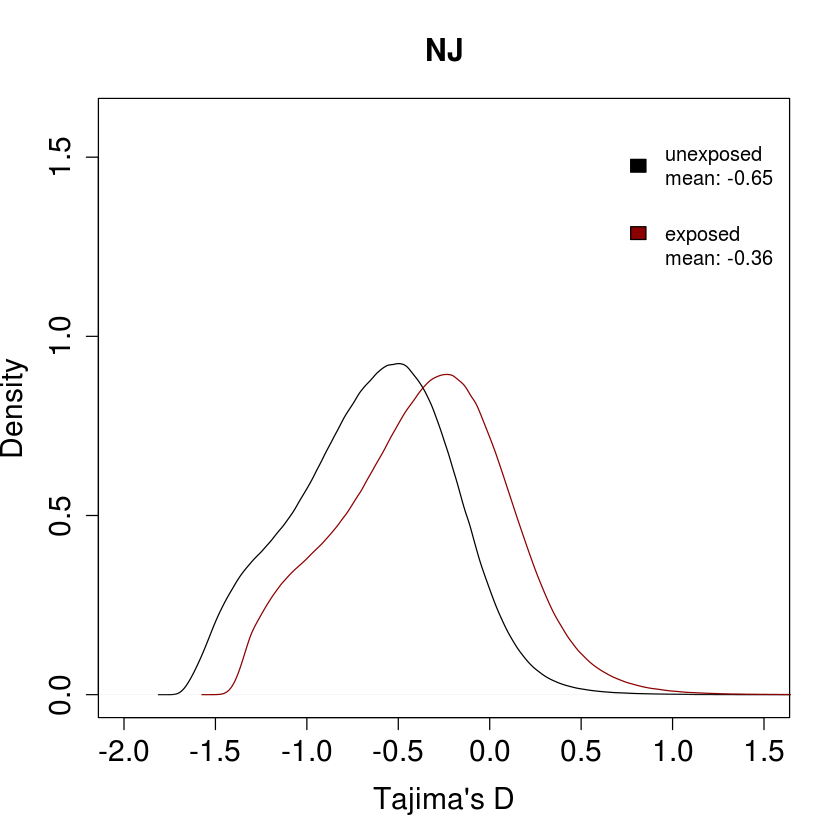

In [39]:
plot(density(NJUz$Tajima), main="NJ", cex.main=1.5, xlab="Tajima's D", cex.lab=1.5, cex.axis=1.5, xlim = c(-2,1.5), ylim=c(0,1.6))
lines(density(NJEz$Tajima), col="darkred") 
legend("topright", c("unexposed \nmean: -0.65", "\nexposed \nmean: -0.36"), fill=c("black", "darkred"), bty="n")

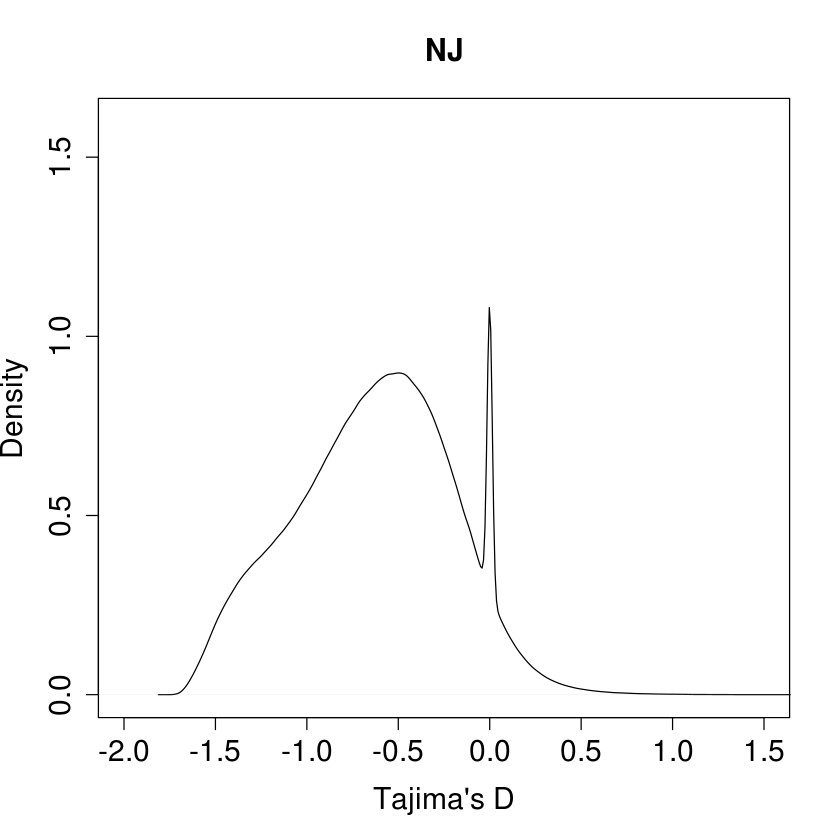

In [24]:
plot(density(NJU$D), main="NJ", cex.main=1.5, xlim = c(-2,1.5), ylim=c(0,1.6), xlab="Tajima's D", cex.lab=1.5, cex.axis=1.5)

In [20]:
mean(NYUz$Tajima)
mean(NYEz$Tajima)

[1] -0.5915969

[1] -0.6365821

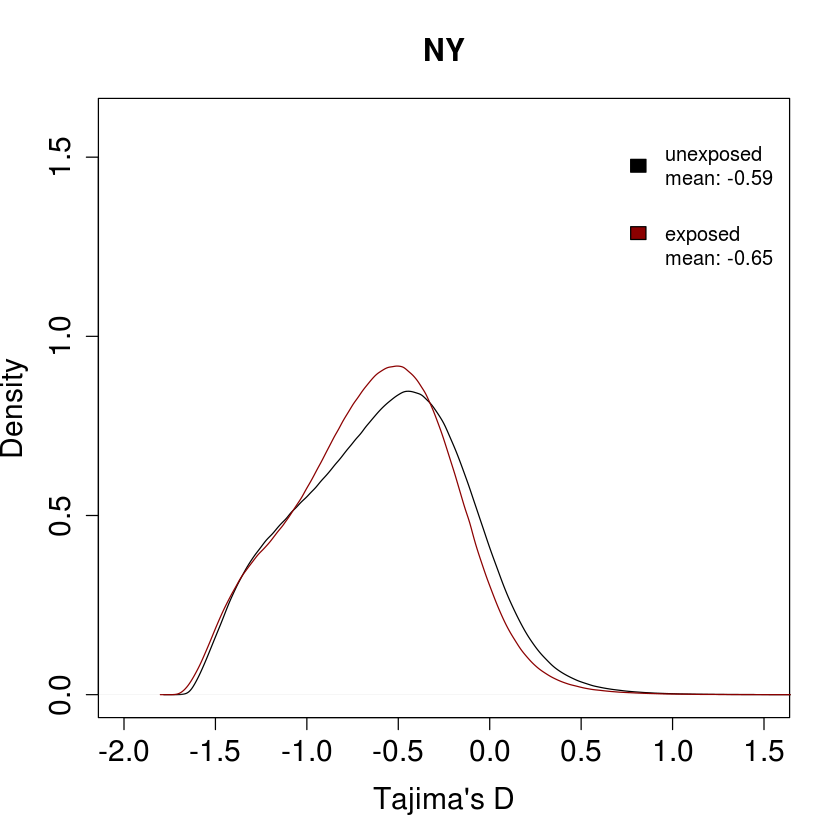

In [40]:
plot(density(NYUz$Tajima), main="NY", cex.main=1.5, xlab="Tajima's D", cex.lab=1.5, cex.axis=1.5, xlim = c(-2,1.5), ylim=c(0,1.6))
lines(density(NYEz$Tajima), col="darkred") 
legend("topright", c("unexposed \nmean: -0.59", "\nexposed \nmean: -0.65"), fill=c("black", "darkred"), bty="n")

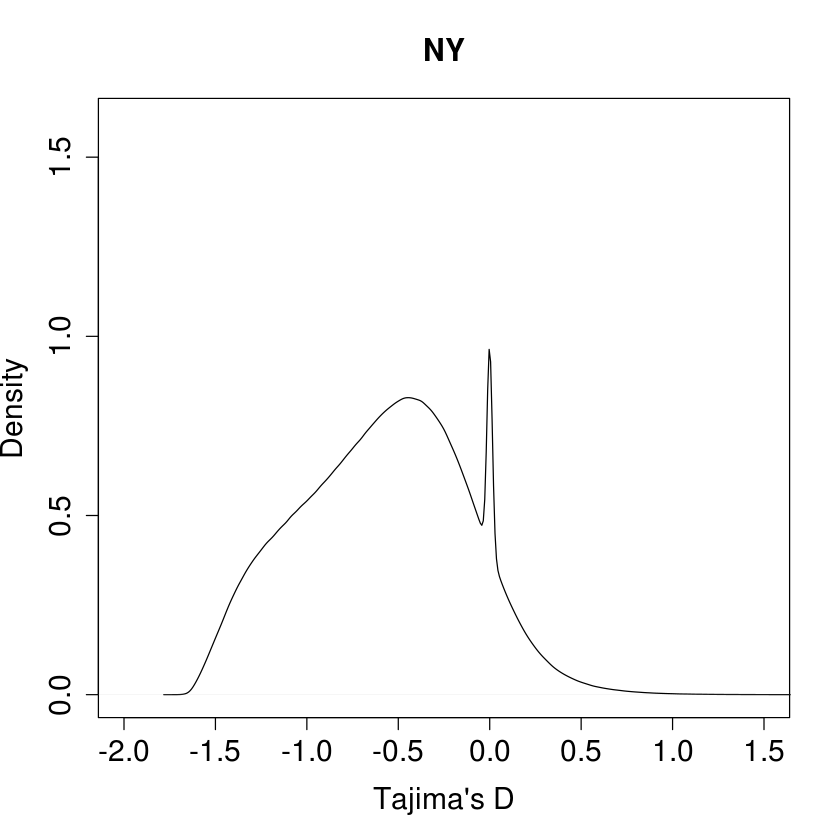

In [22]:
plot(density(NYU$D), main="NY", cex.main=1.5, xlim = c(-2,1.5), ylim=c(0,1.6), xlab="Tajima's D", cex.lab=1.5, cex.axis=1.5)

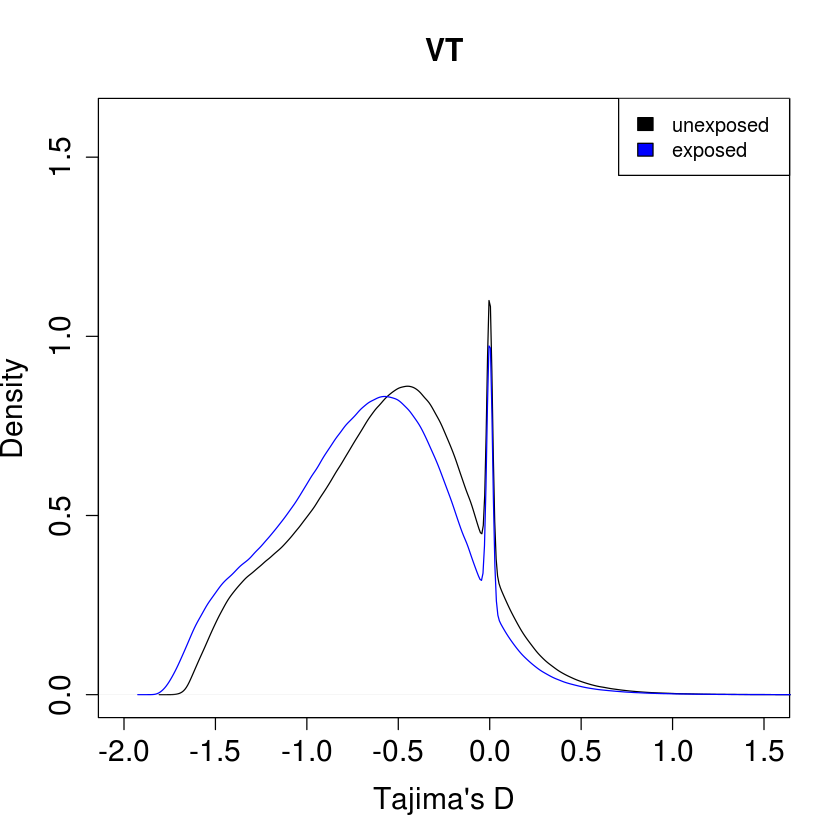

In [25]:
plot(density(VTU$D), main="VT", cex.main=1.5, xlab="Tajima's D", cex.lab=1.5, cex.axis=1.5, xlim = c(-2,1.5), ylim=c(0,1.6)) 
lines(density(VTE$D), col="blue") 
legend("topright", c("unexposed", "exposed"), fill=c("black", "blue"))

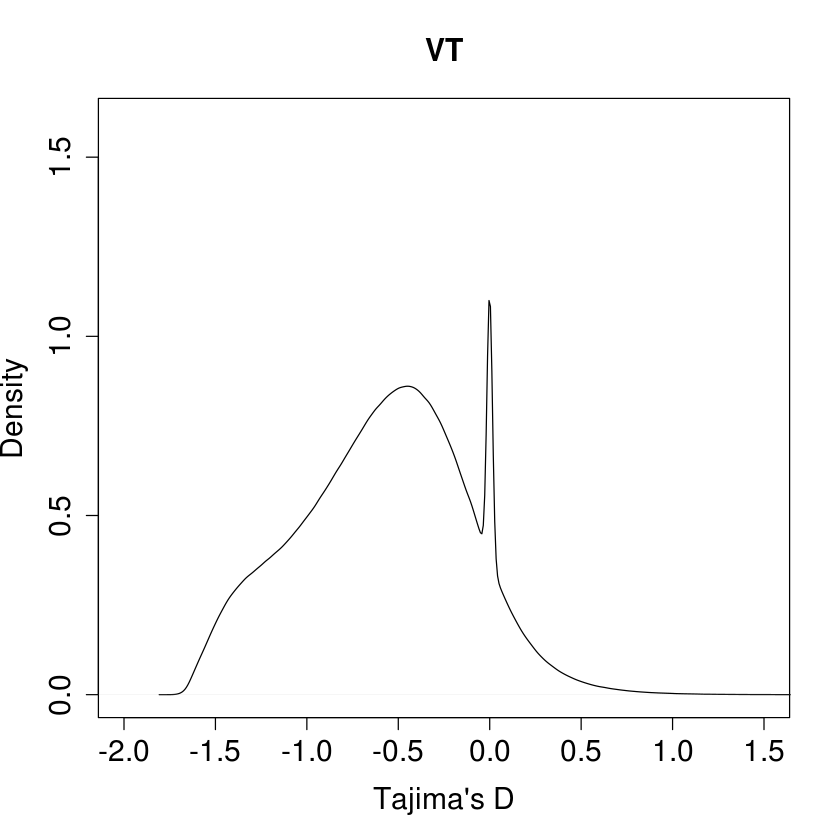

In [26]:
plot(density(VTU$D), main="VT", cex.main=1.5, xlab="Tajima's D", cex.lab=1.5, cex.axis=1.5, xlim = c(-2,1.5), ylim=c(0,1.6)) 